In [1]:
import pandas as pd
import numpy as np

In [2]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

In [3]:
train=pd.read_csv('E:/Global_forecasting/train.csv')

In [4]:
train.isna().sum()

Id                    0
Province_State    13376
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [7]:
train=train.groupby(['Country_Region','Date'])[['ConfirmedCases','Fatalities']].agg('sum').reset_index()

In [109]:
train.Date=pd.to_datetime(train.Date,format='%Y-%m-%d')

In [110]:
train.set_index(train.Date,drop=True, inplace=True)
train.drop(columns='Date',inplace=True)

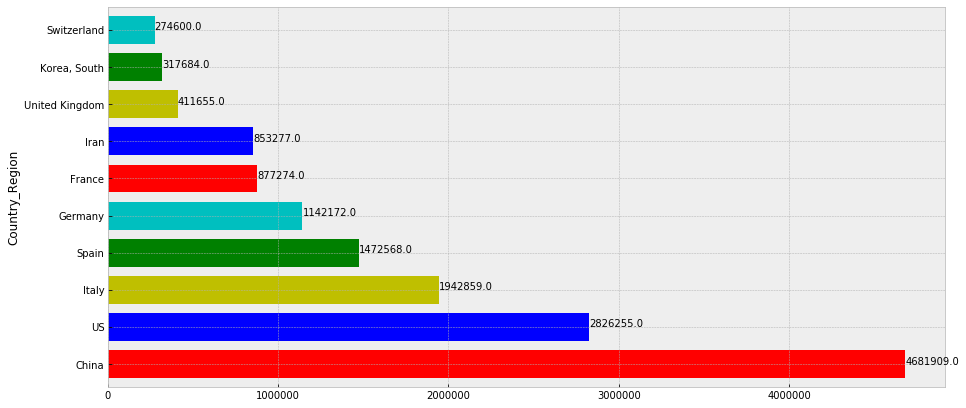

In [9]:

rect1=train.groupby('Country_Region')['ConfirmedCases'].agg('sum').sort_values(ascending=False).head(10)
rect1.plot(kind='barh',width=0.75,color=['r','b','y','g','c','r','b','y','g','c'],figsize=(15,7))
for index, value in enumerate(rect1):
    plt.text(value, index, str(value))
plt.show()

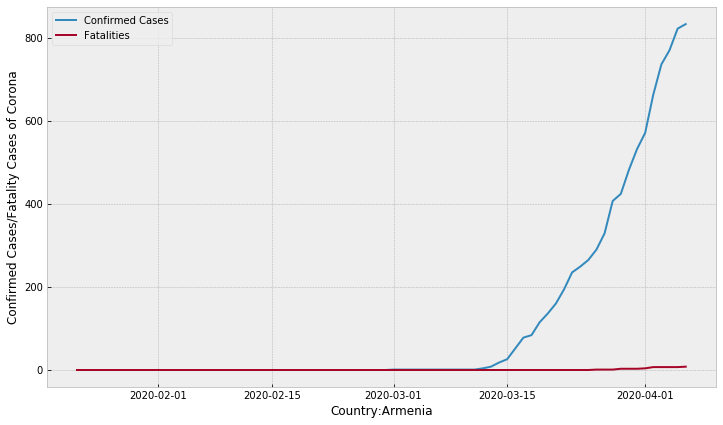

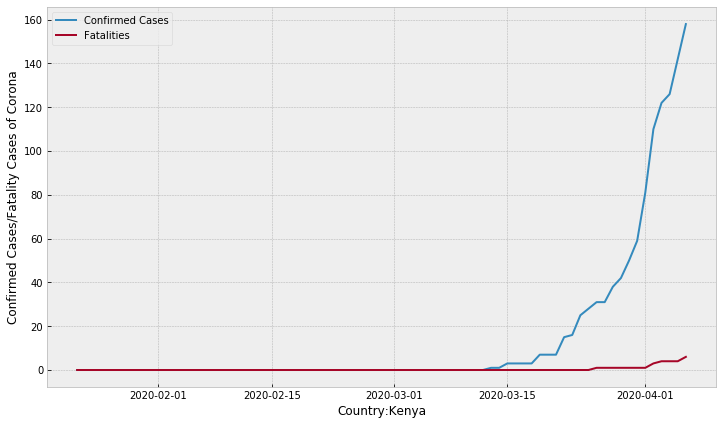

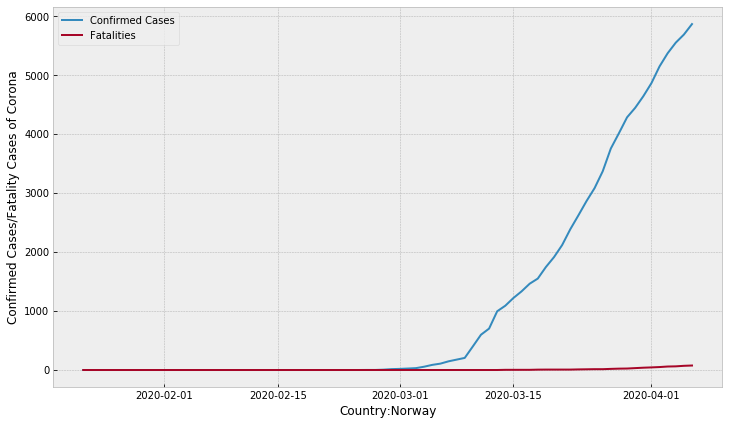

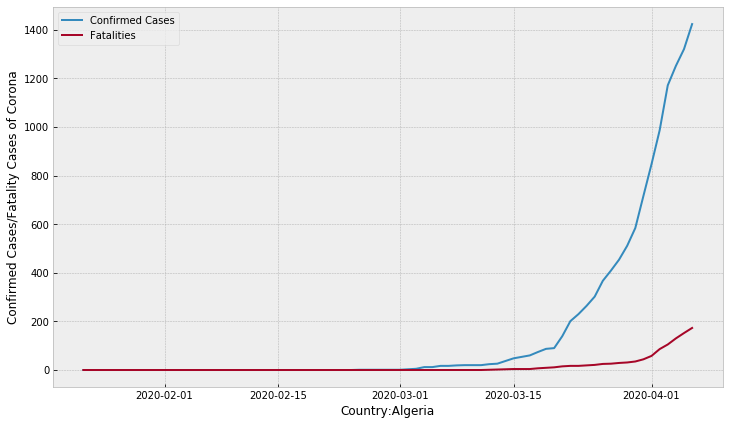

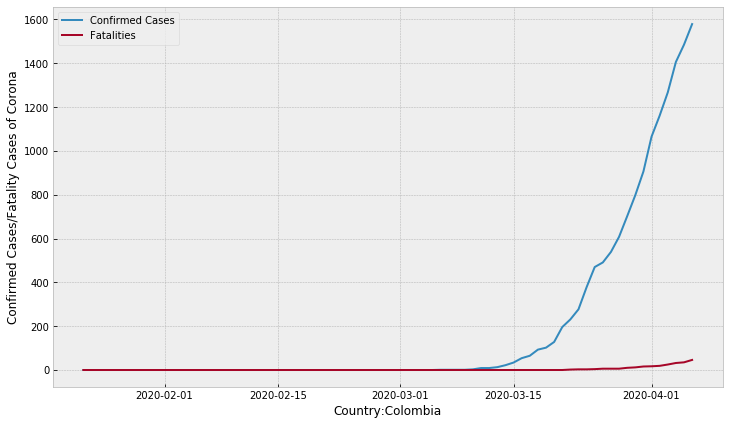

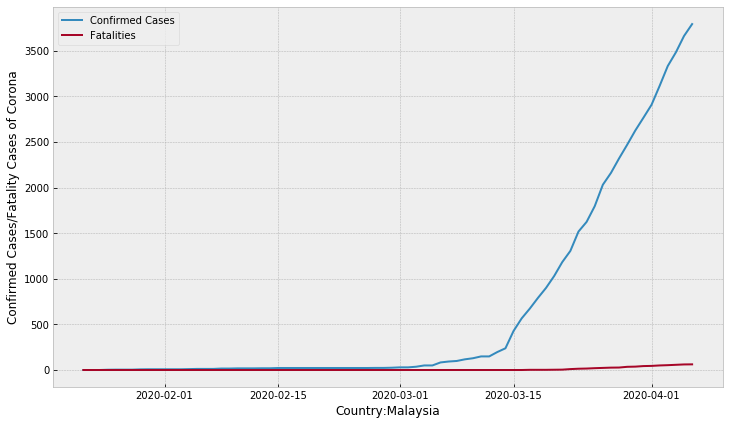

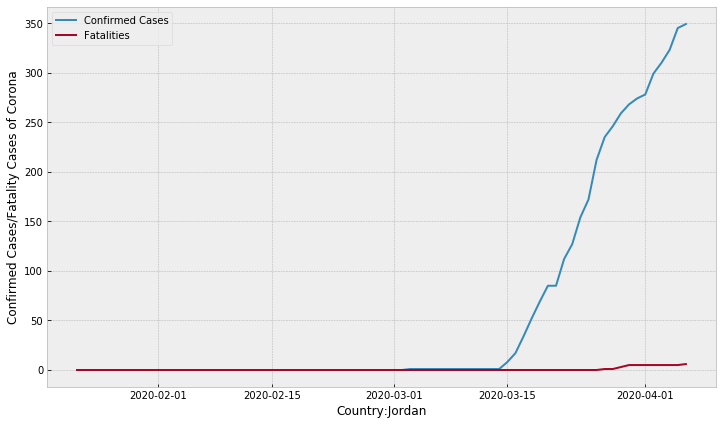

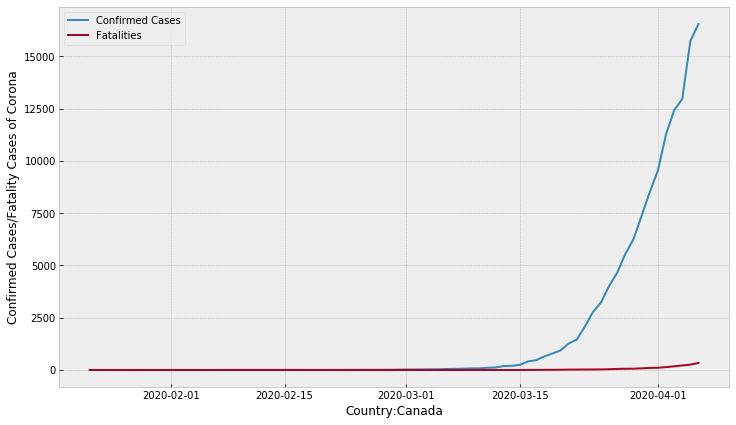

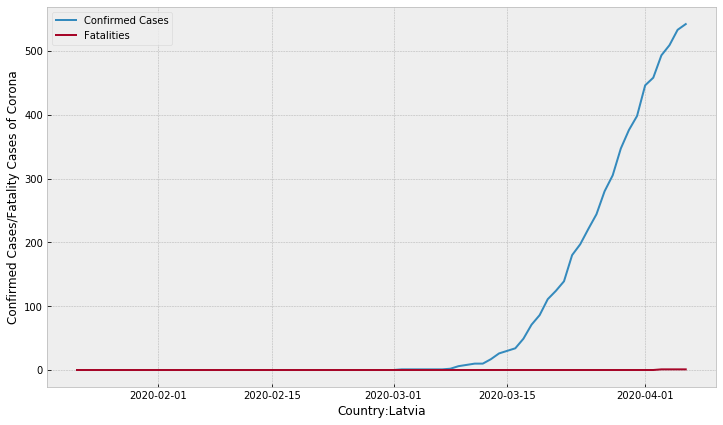

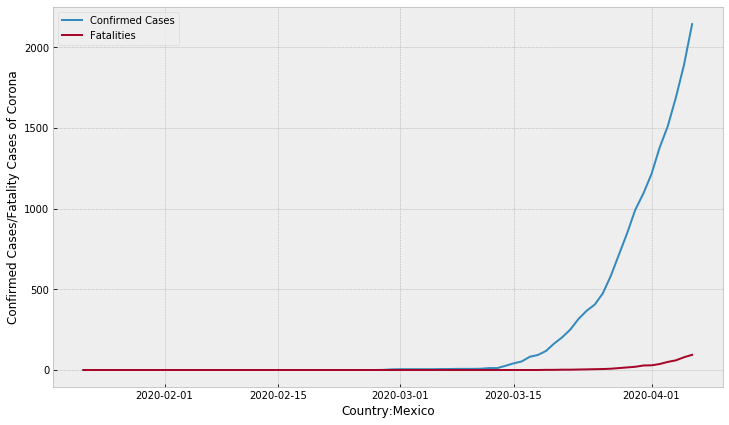

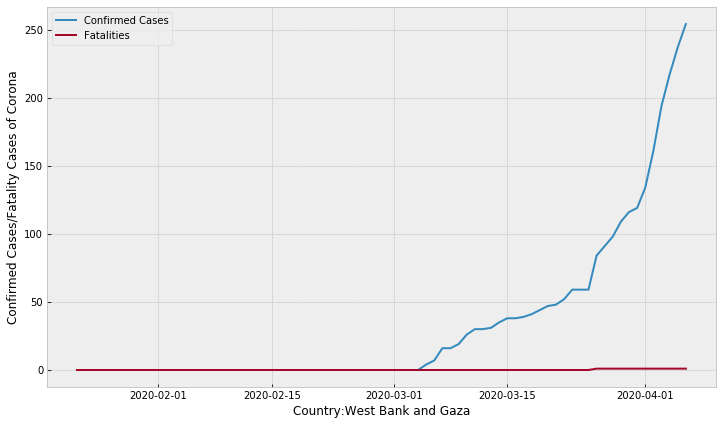

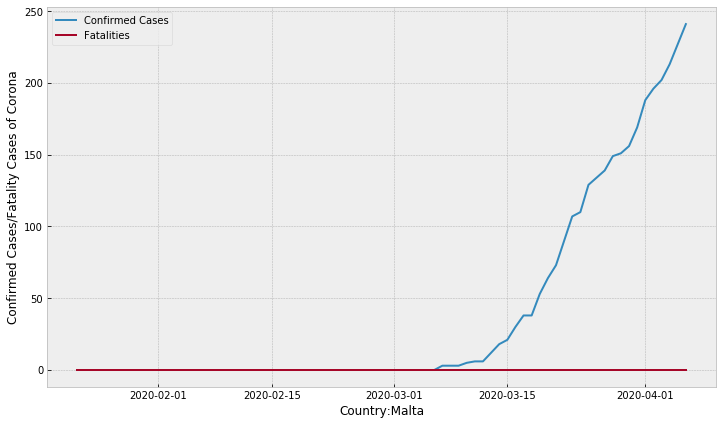

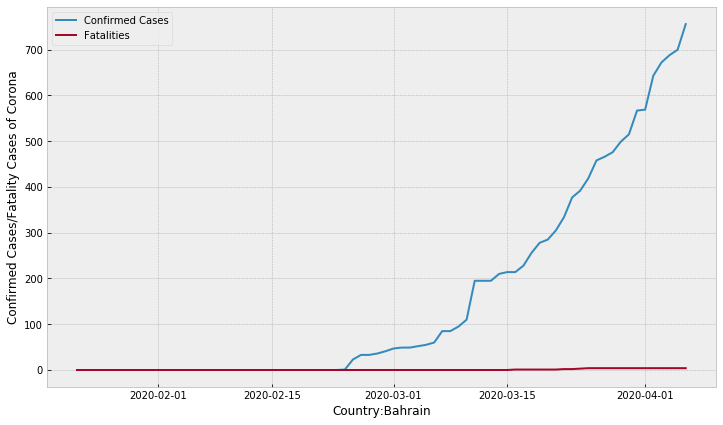

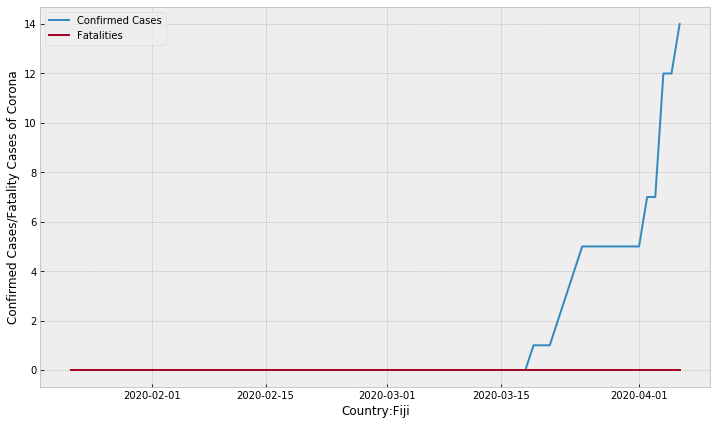

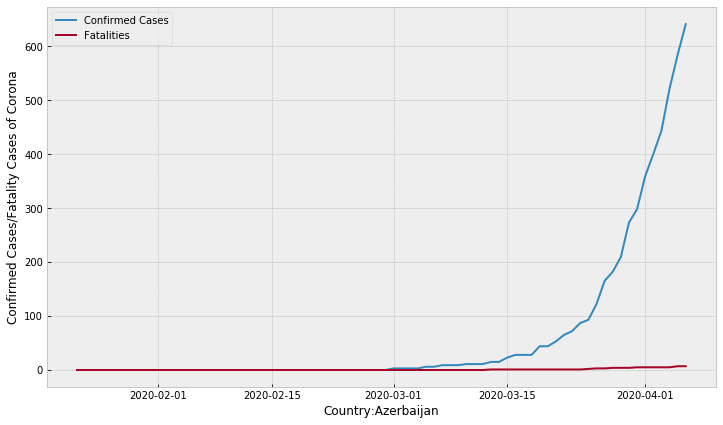

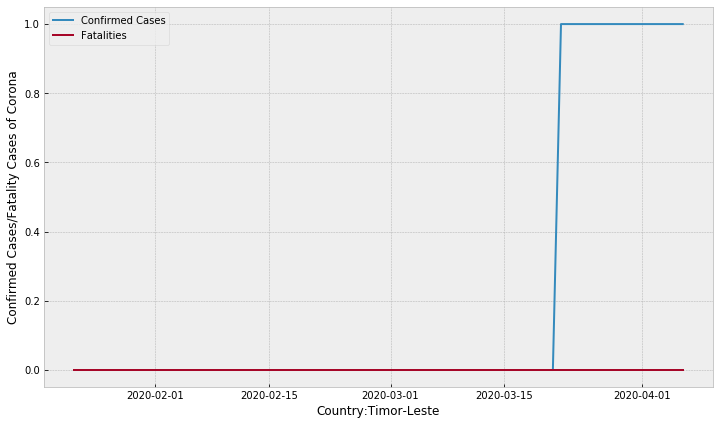

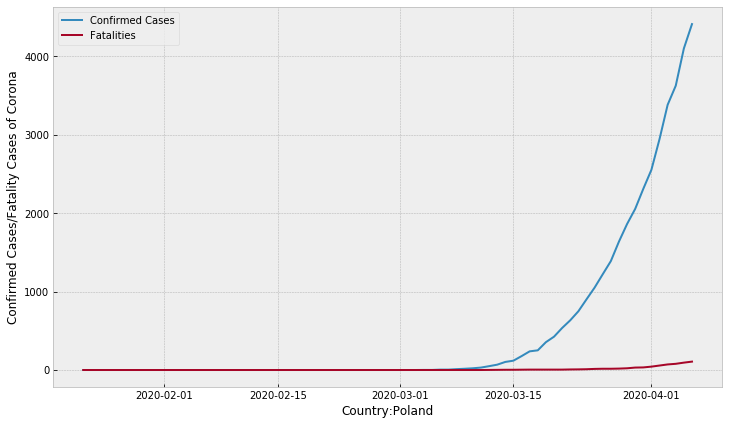

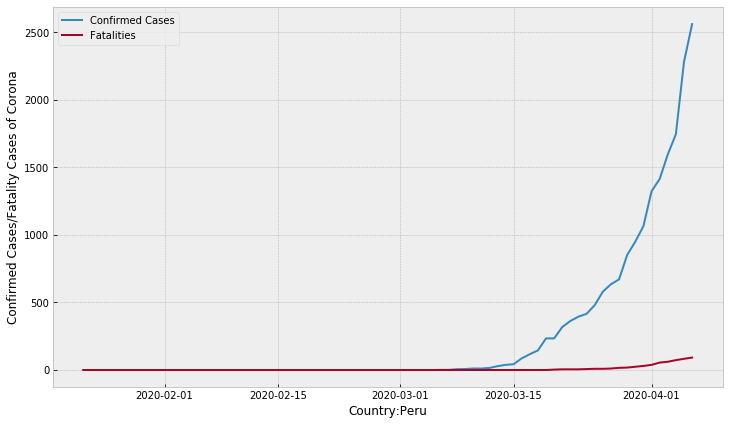

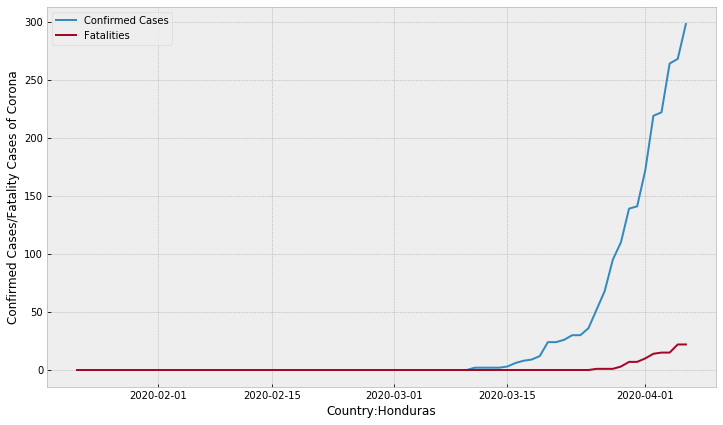

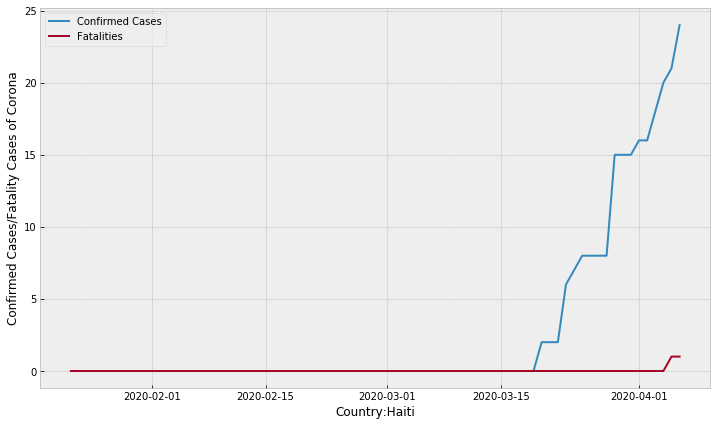

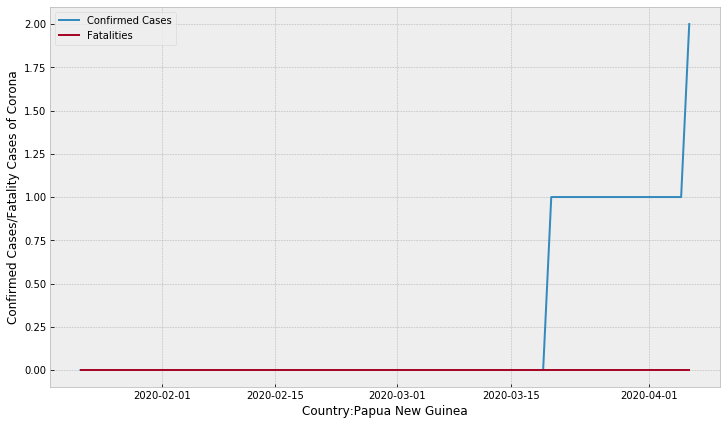

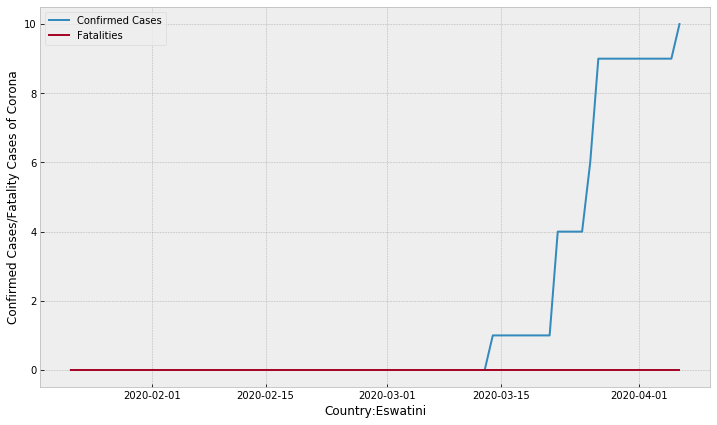

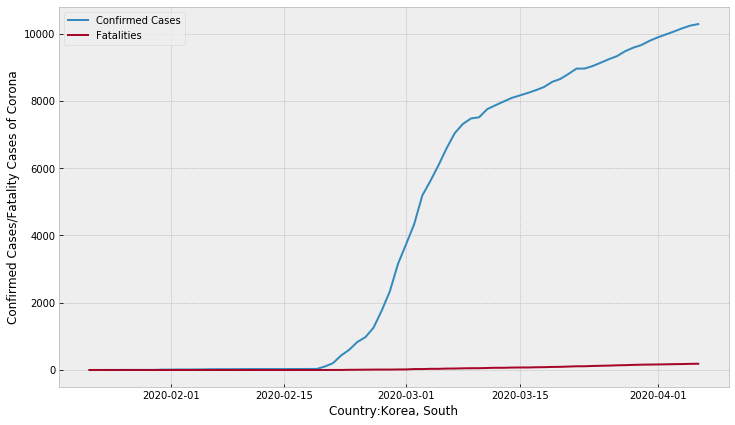

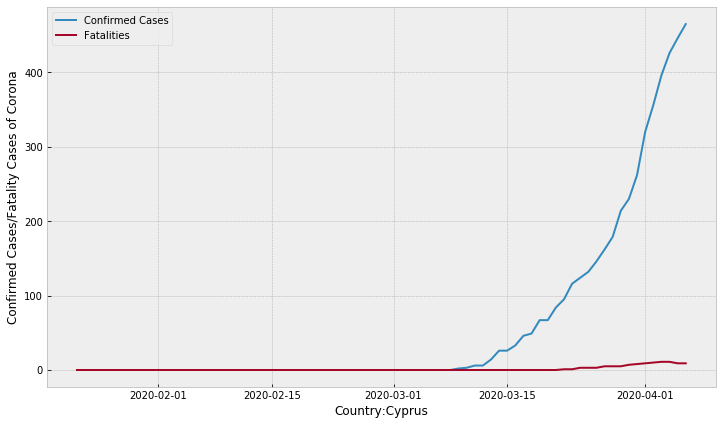

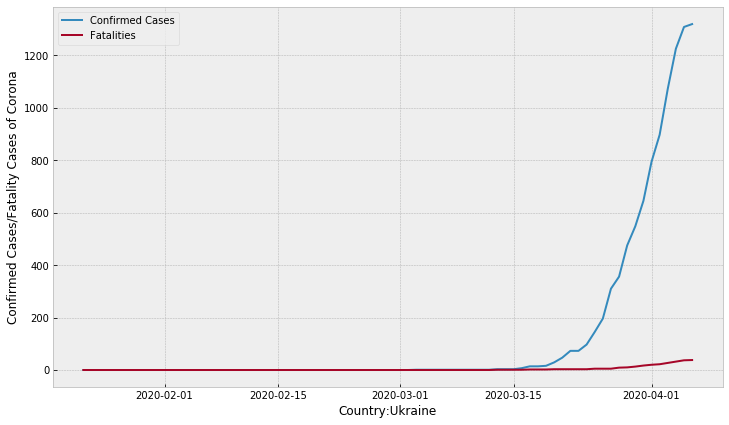

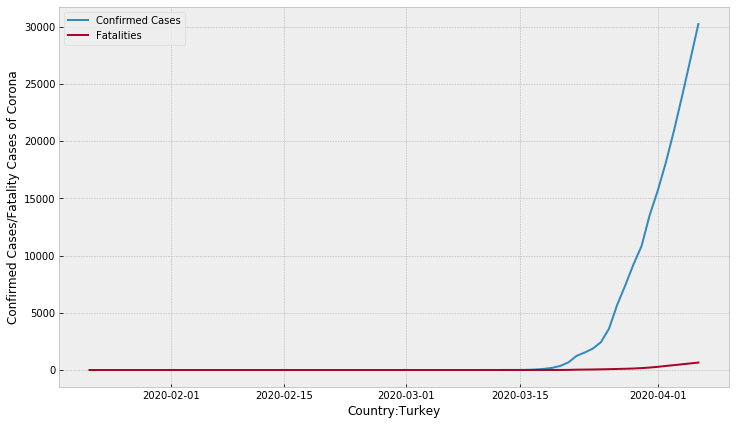

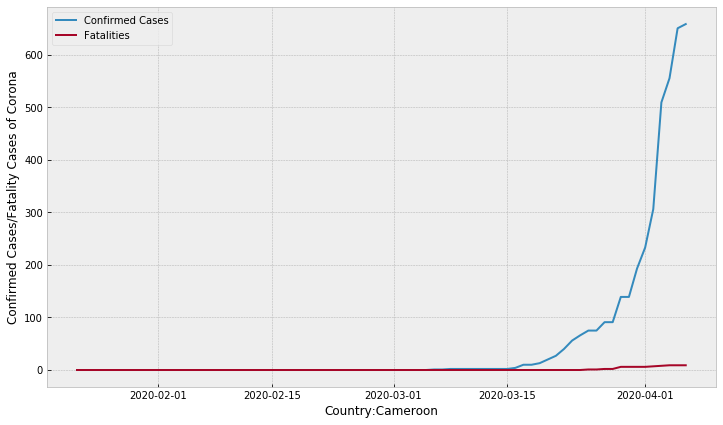

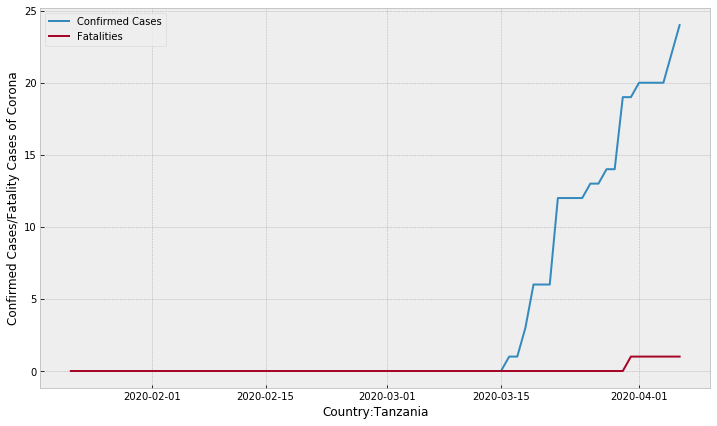

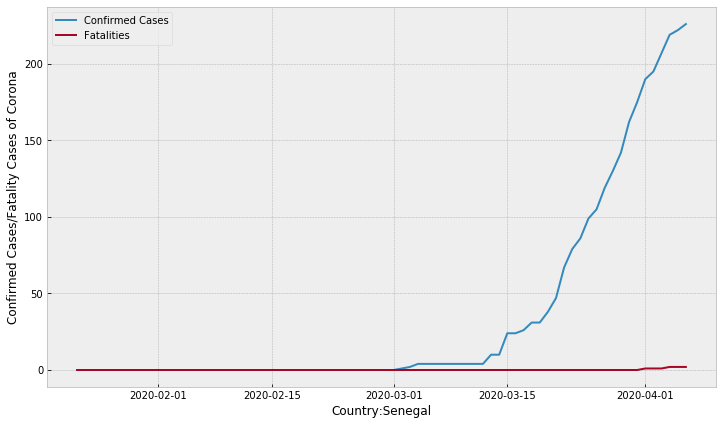

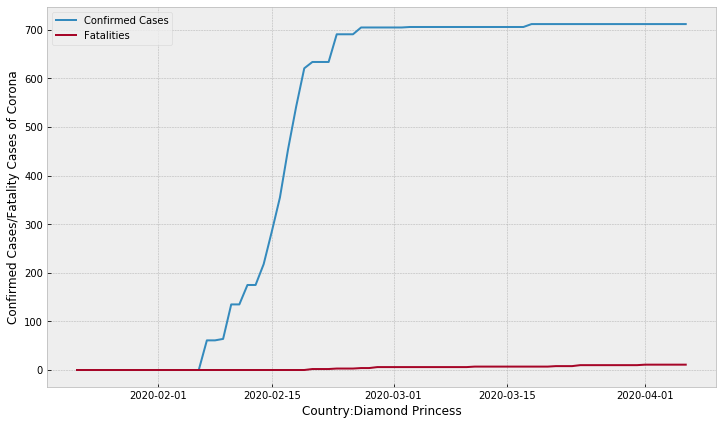

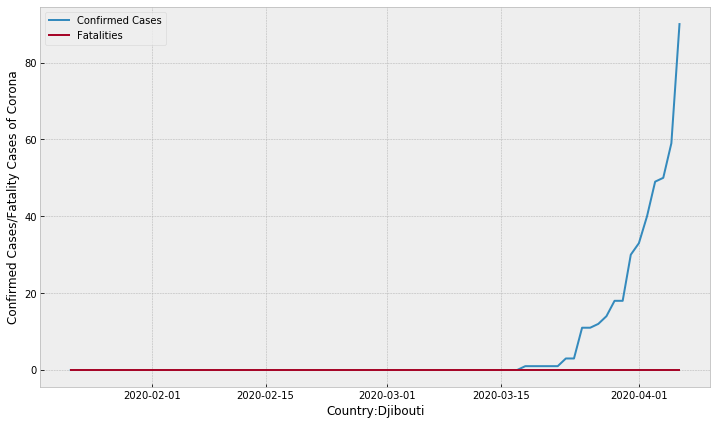

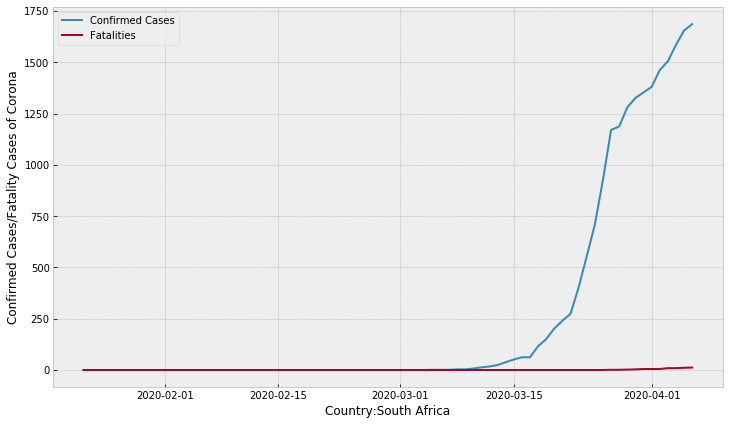

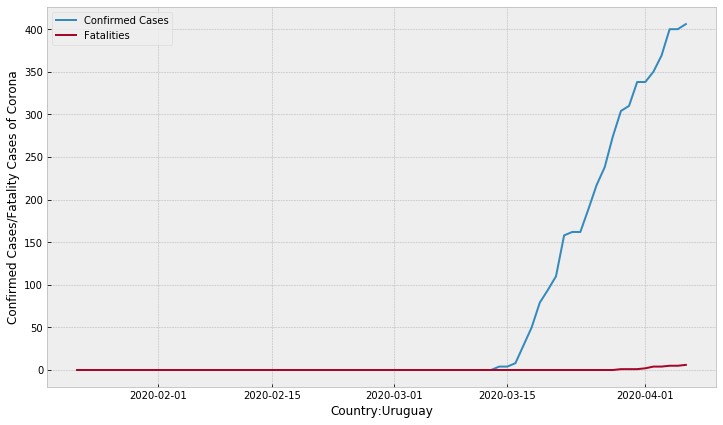

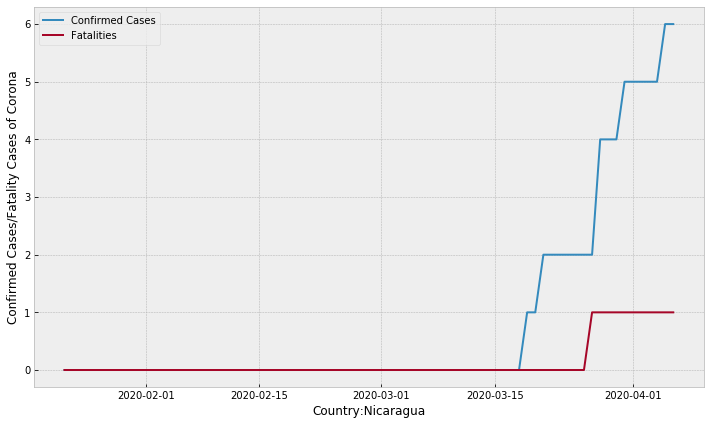

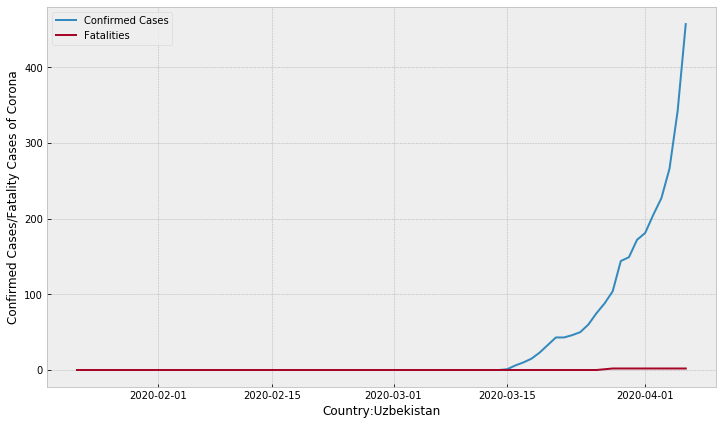

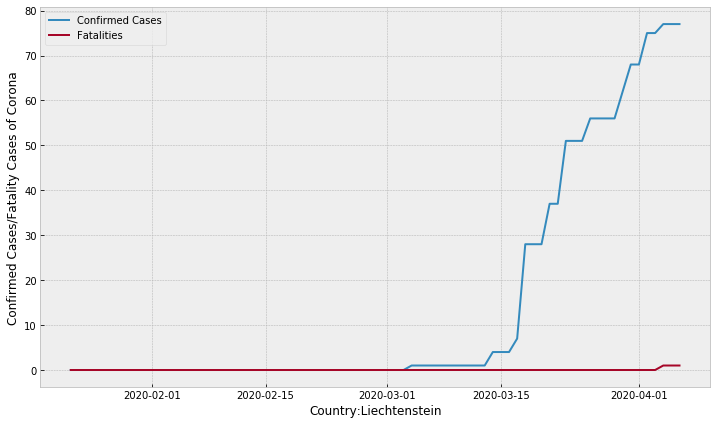

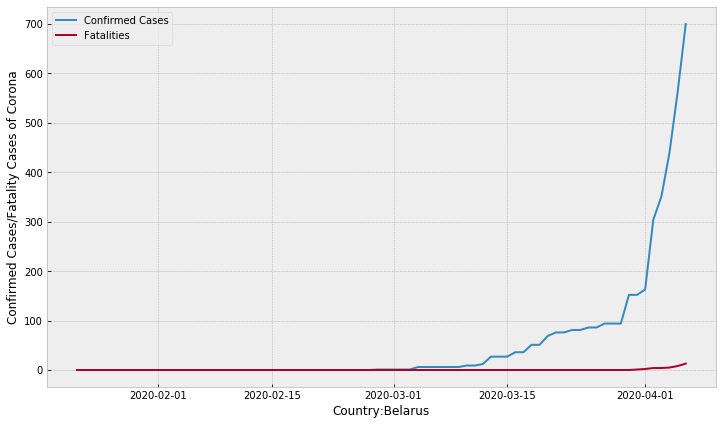

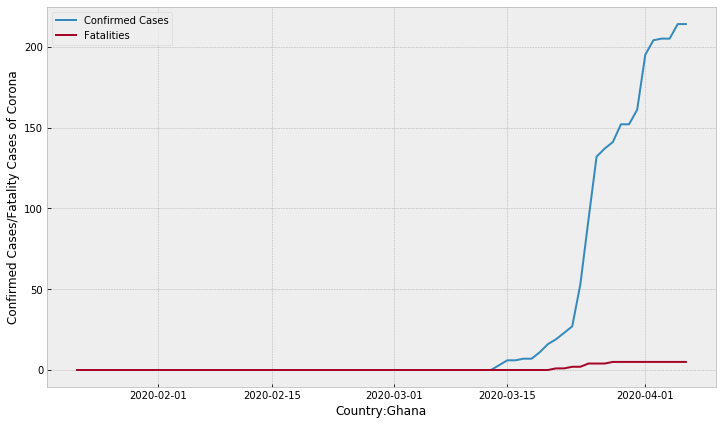

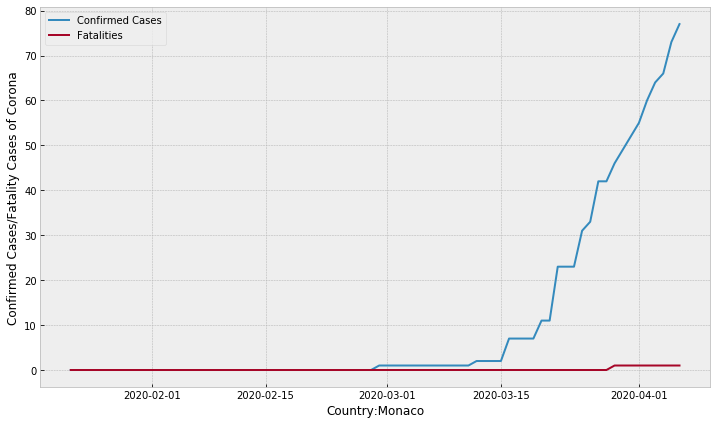

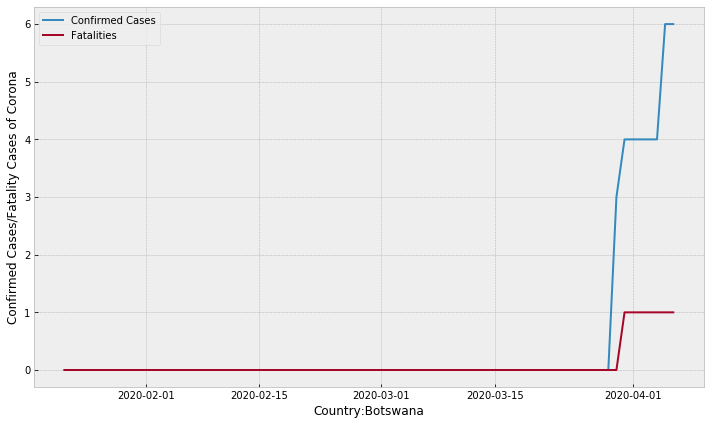

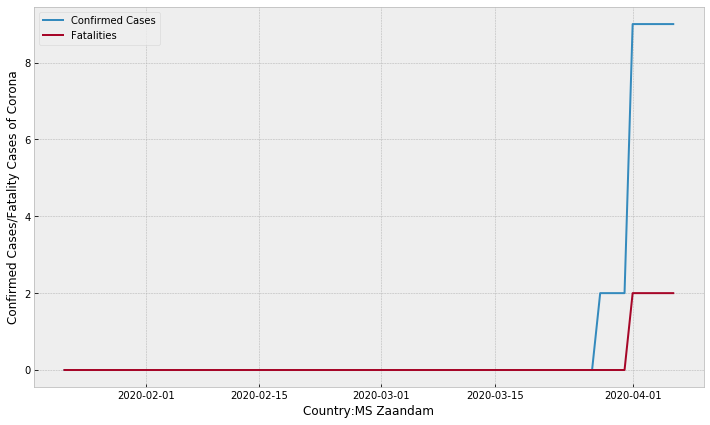

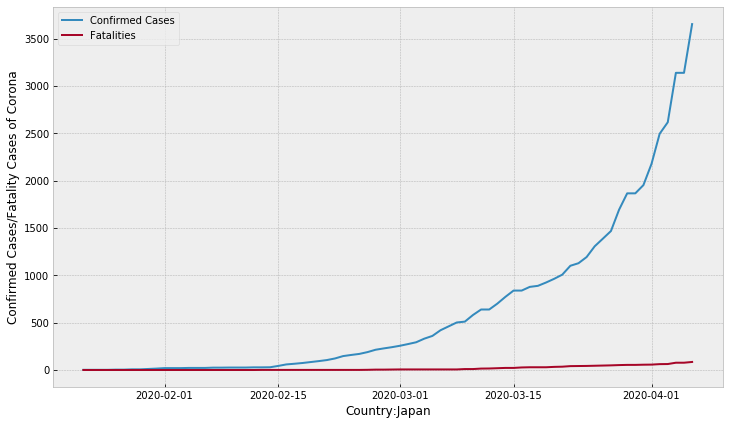

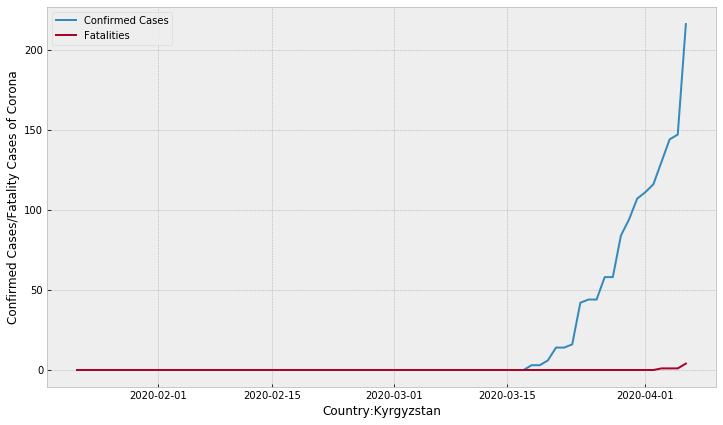

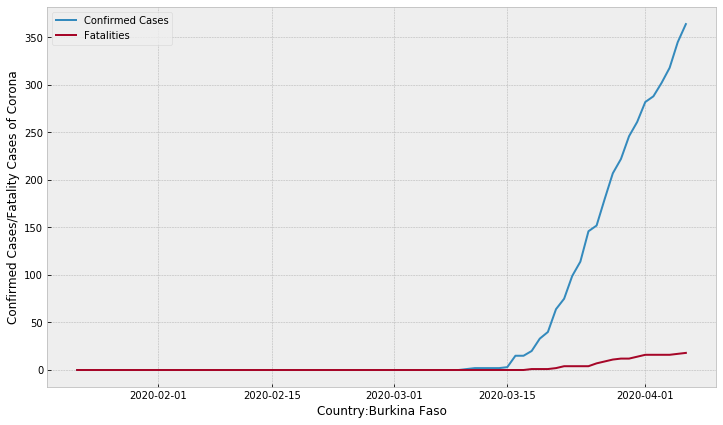

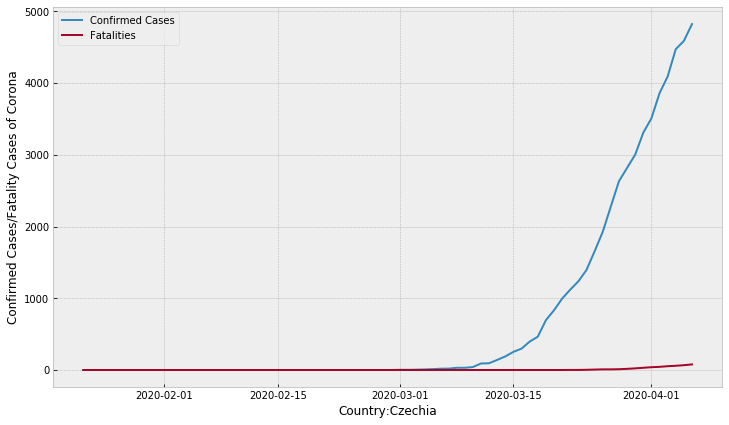

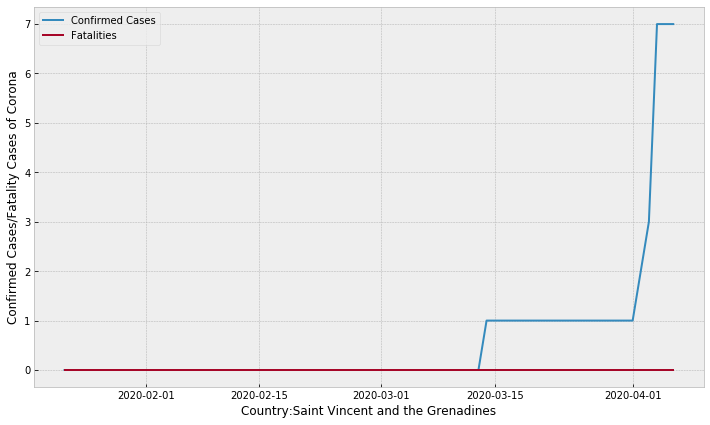

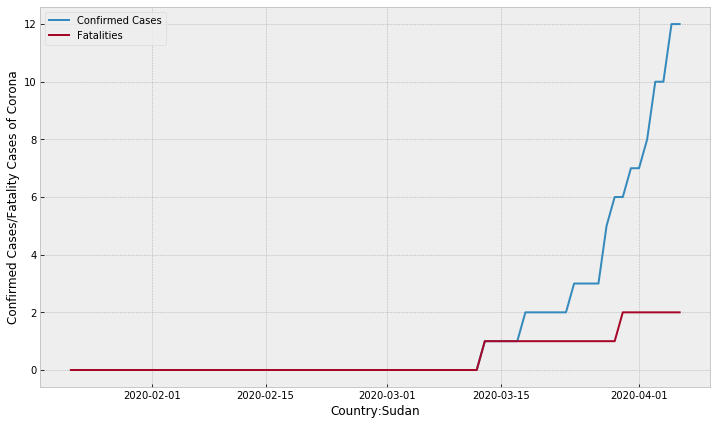

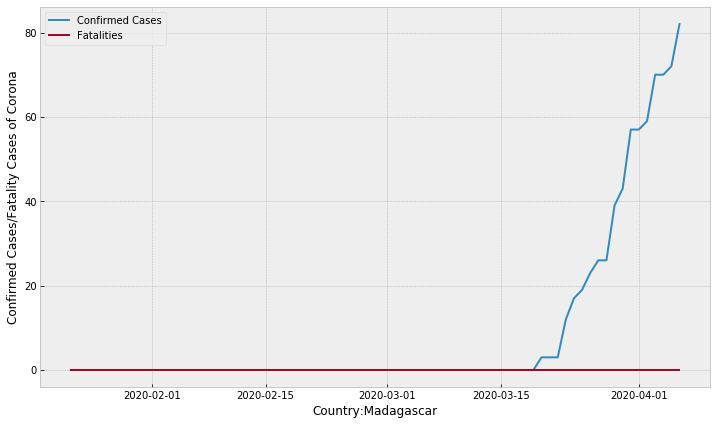

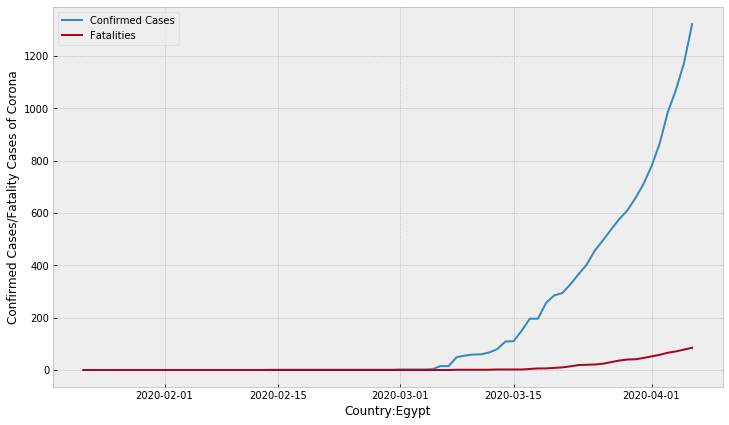

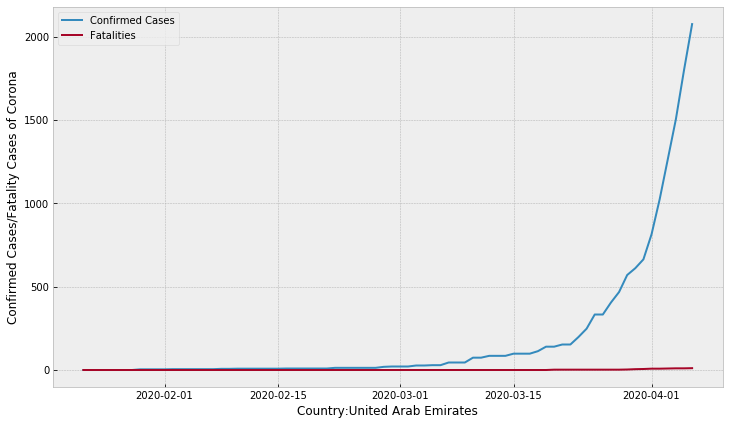

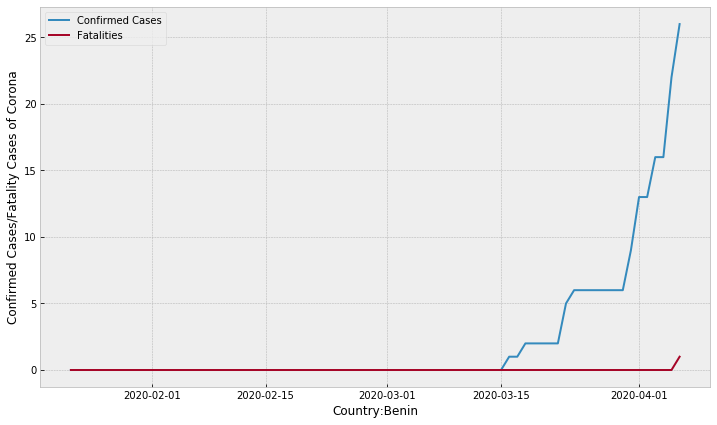

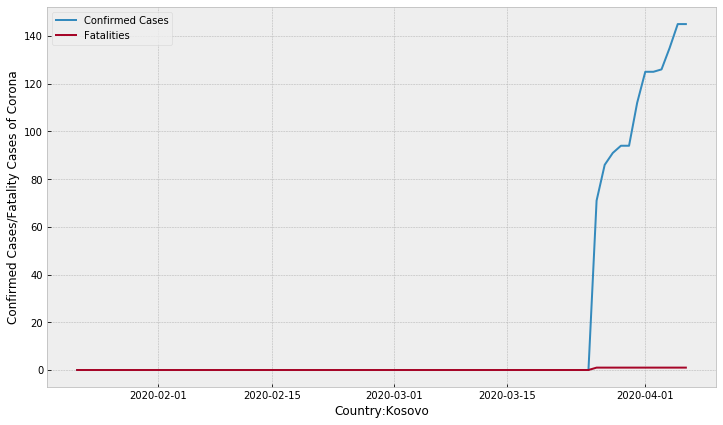

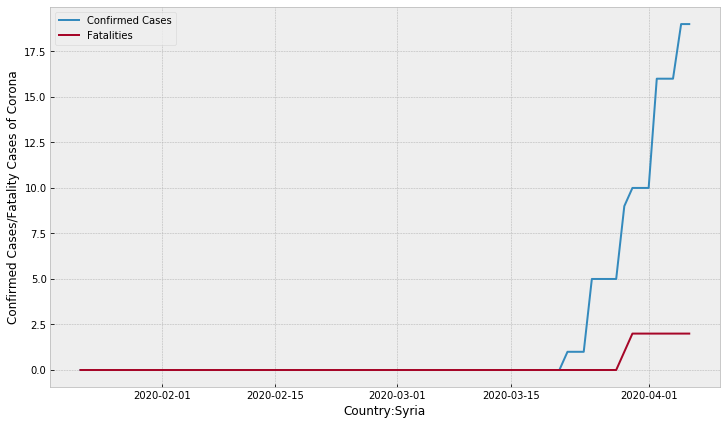

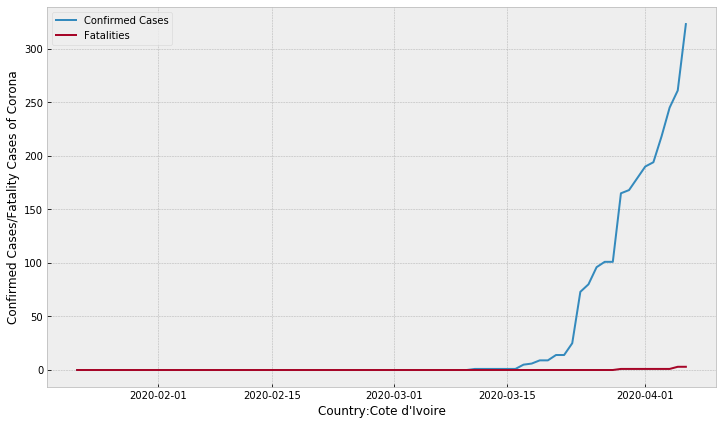

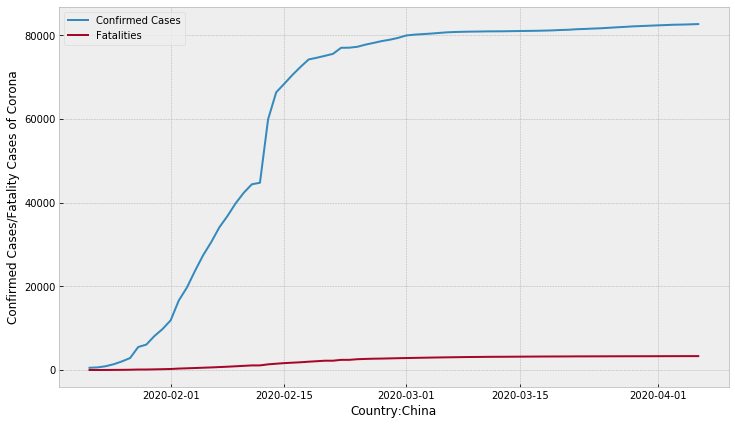

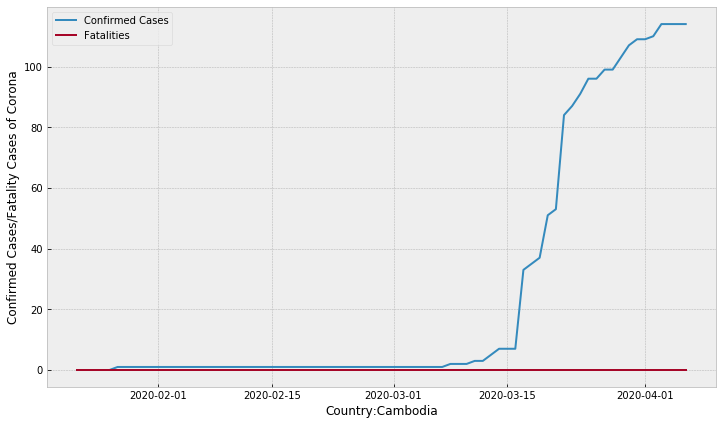

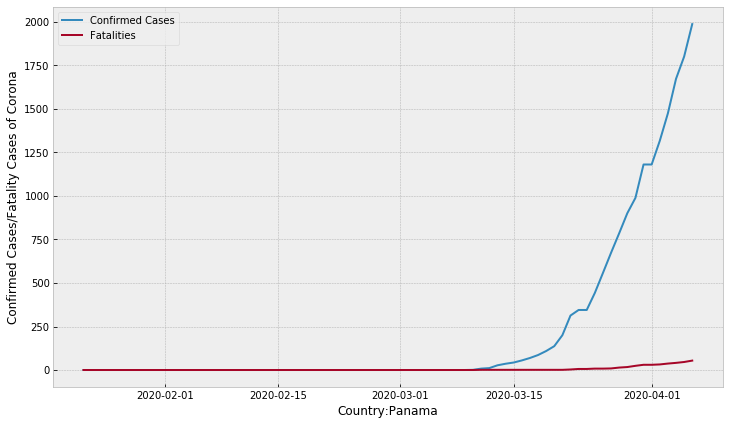

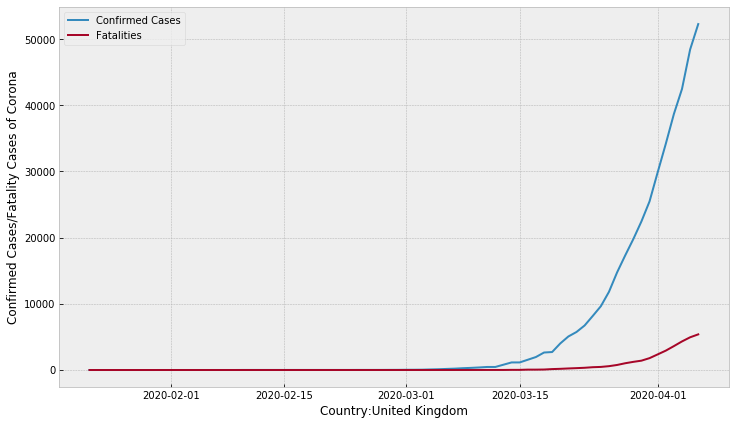

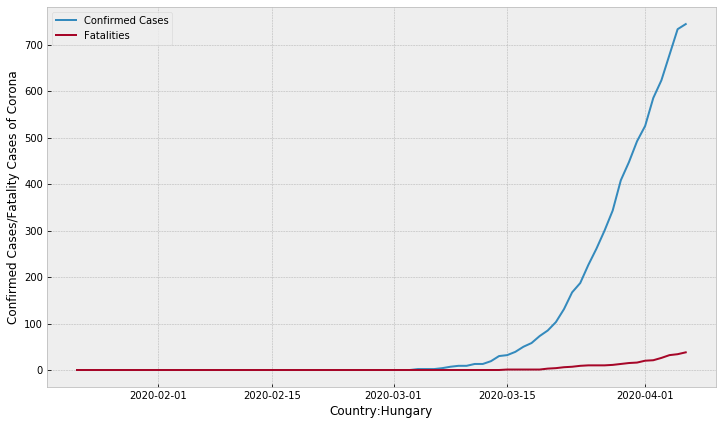

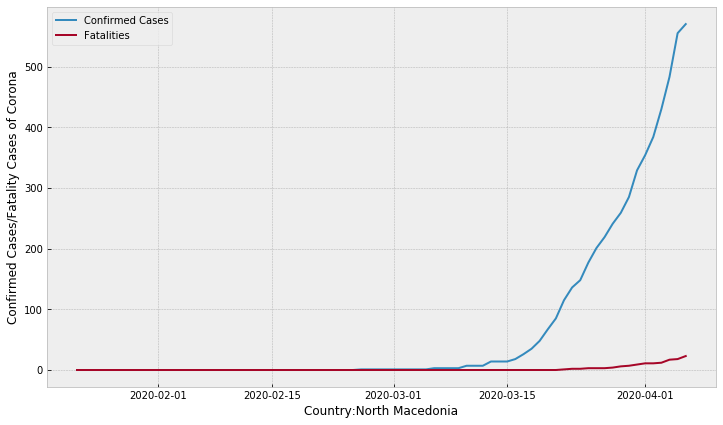

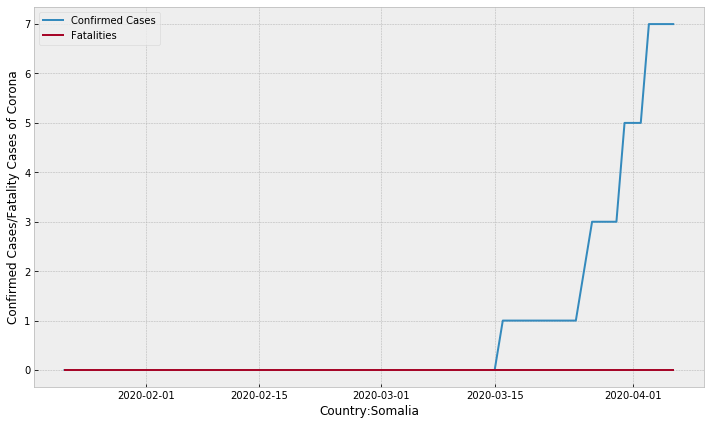

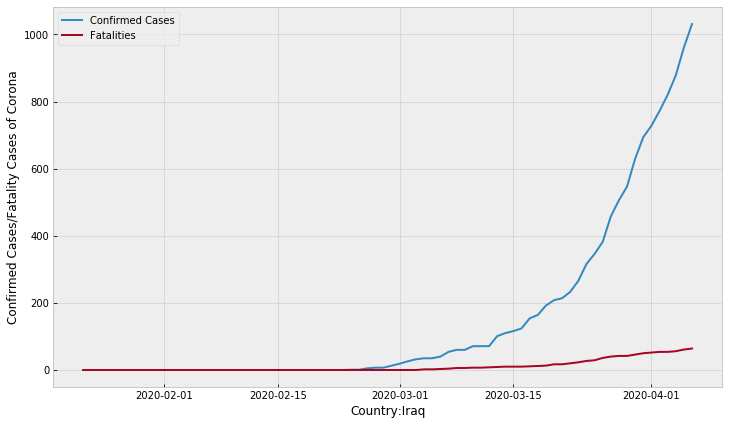

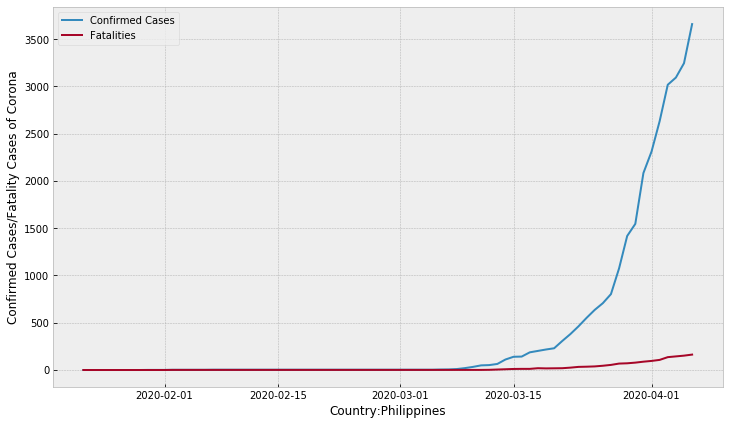

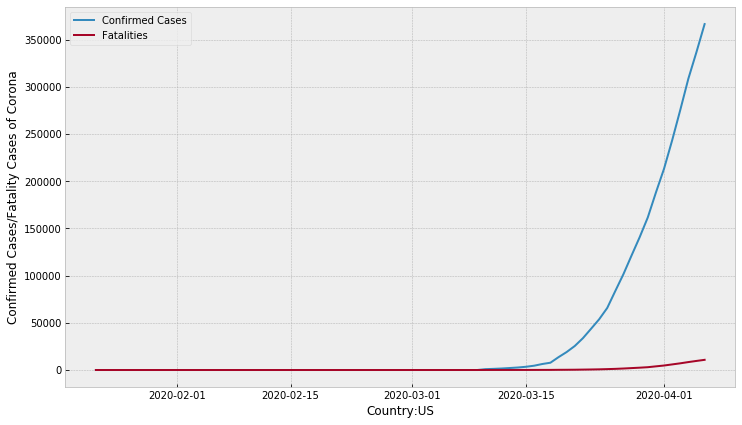

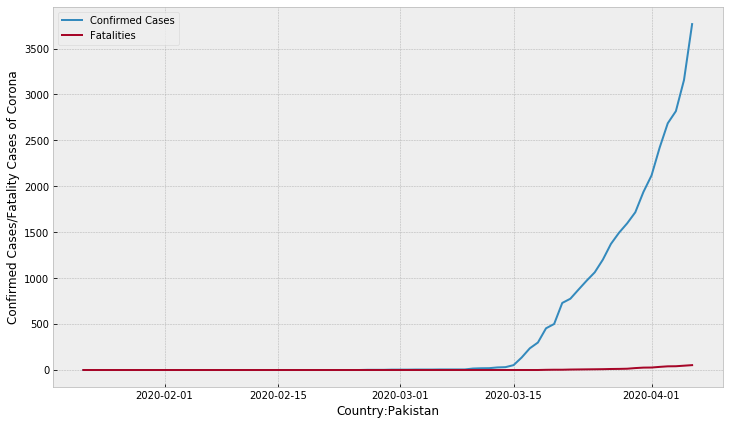

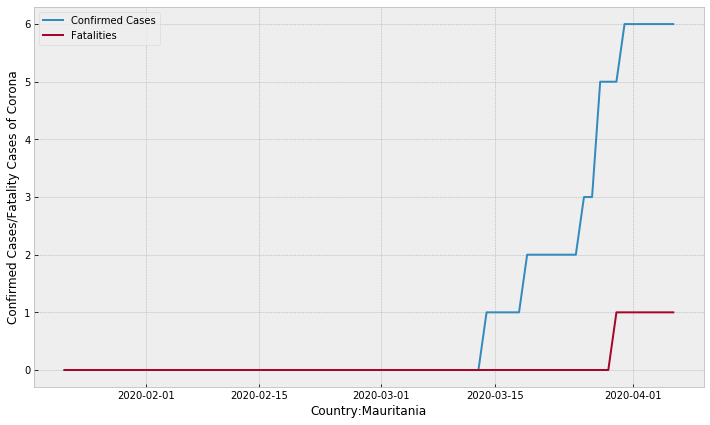

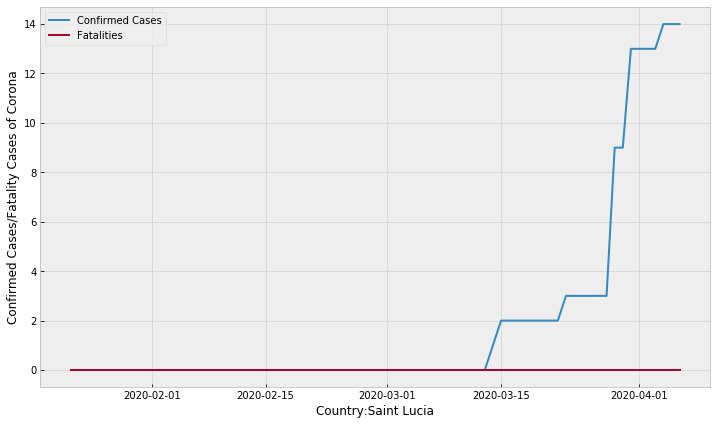

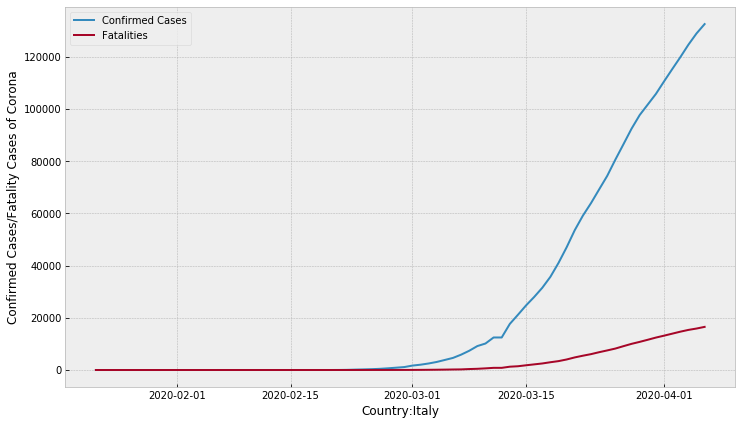

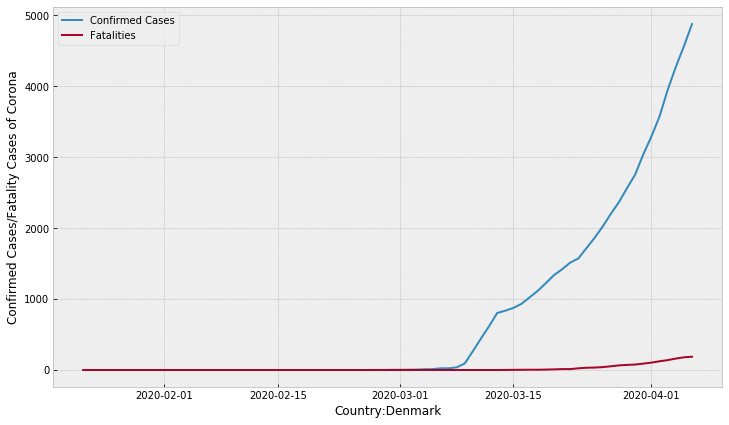

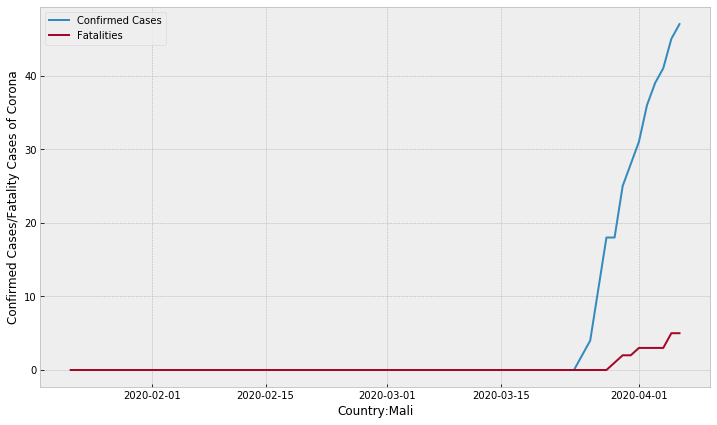

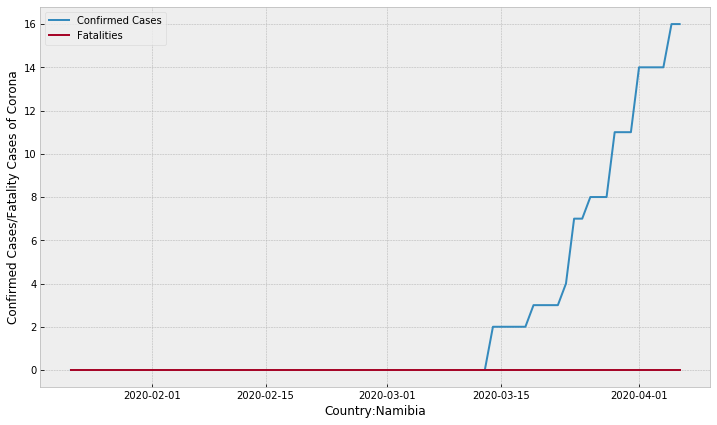

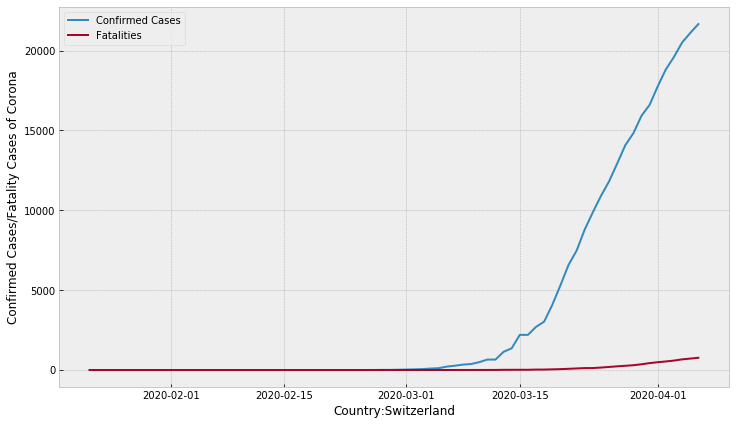

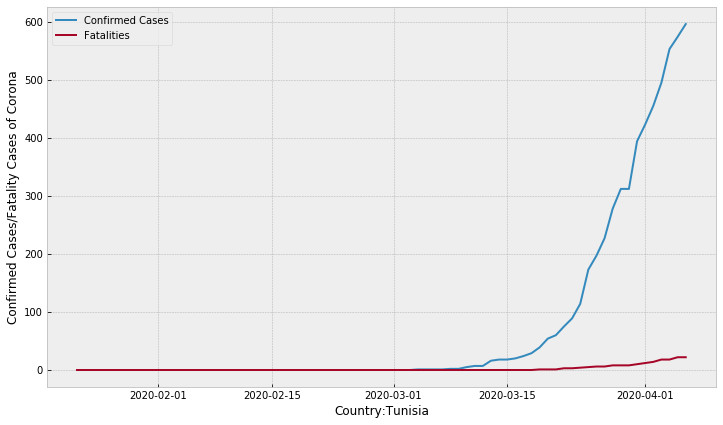

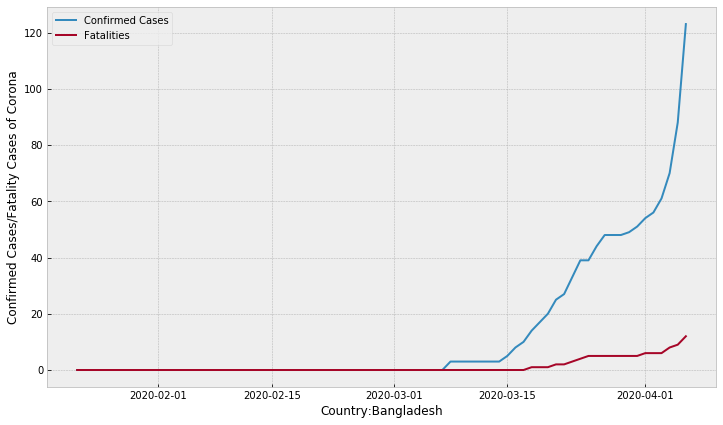

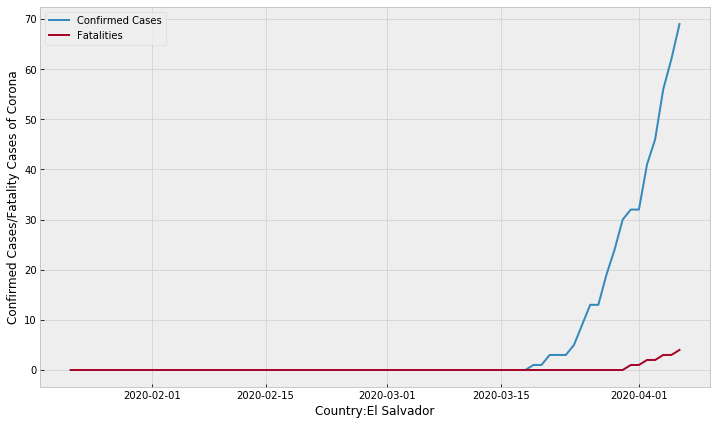

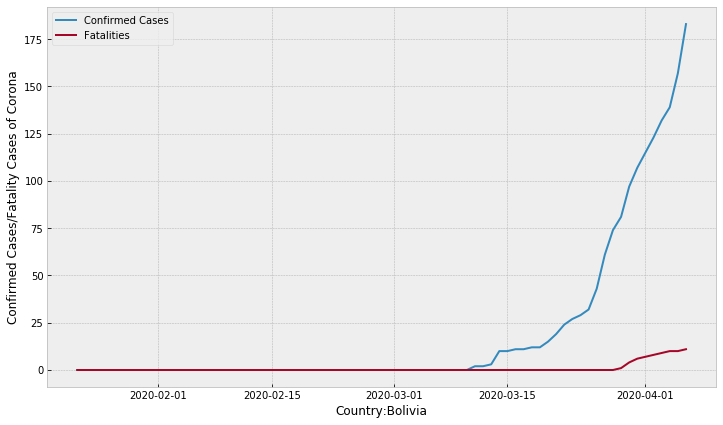

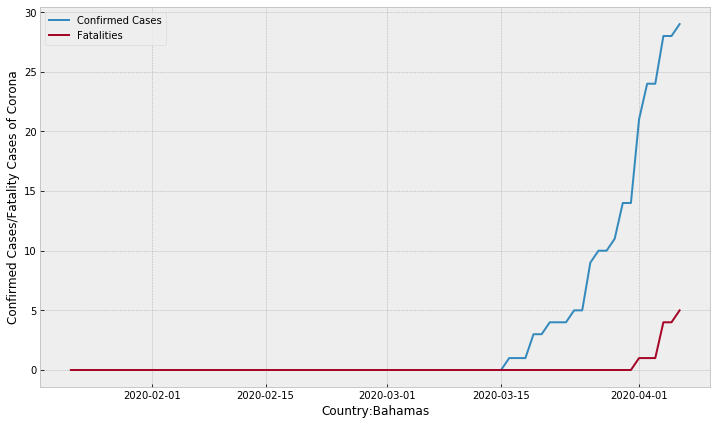

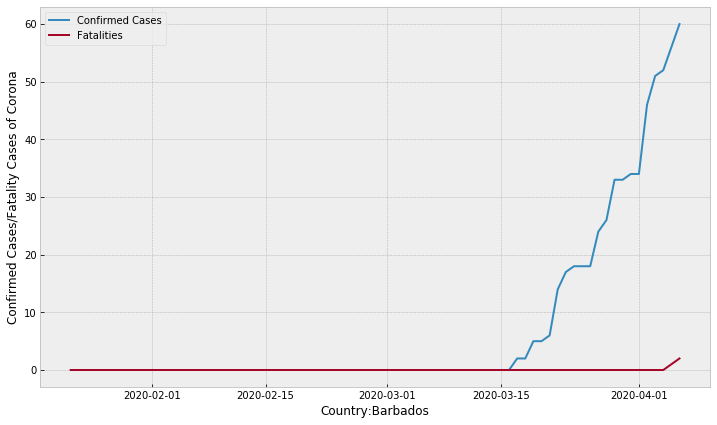

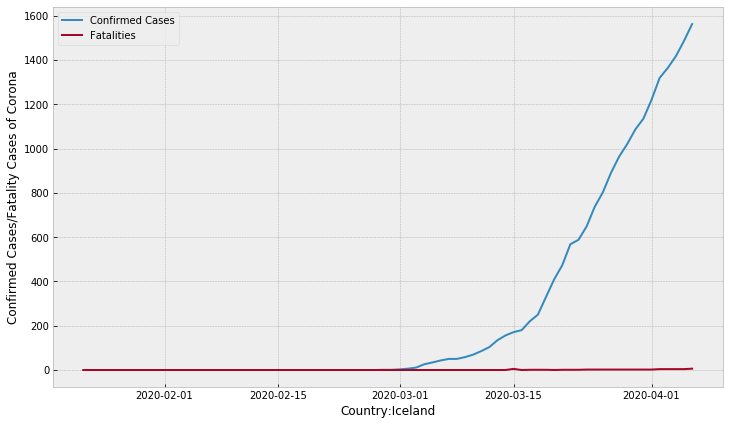

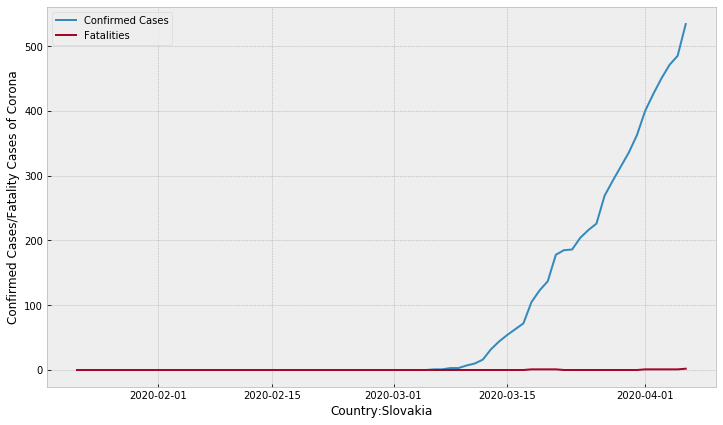

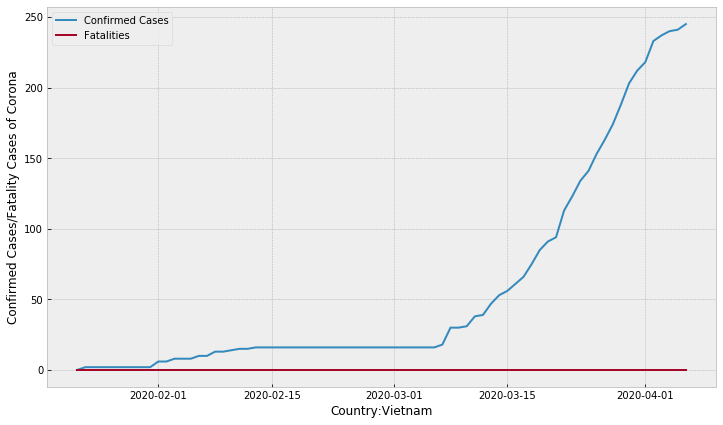

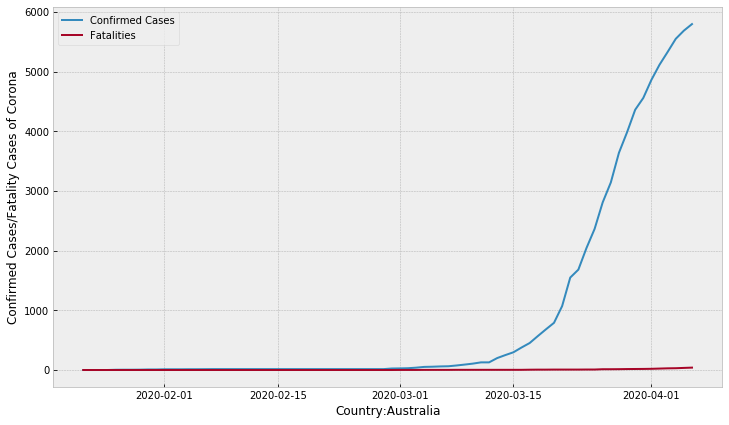

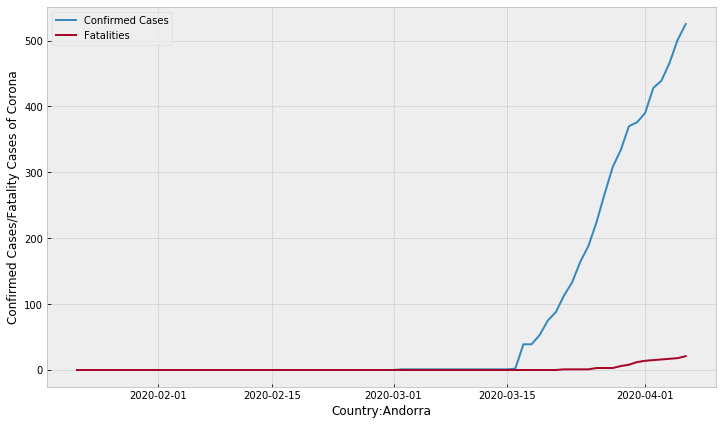

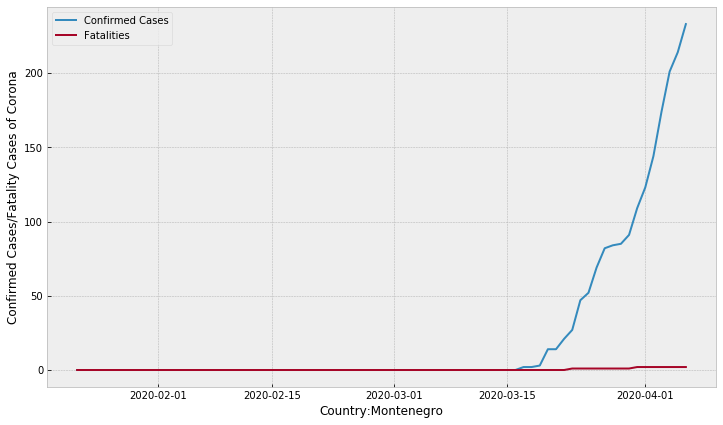

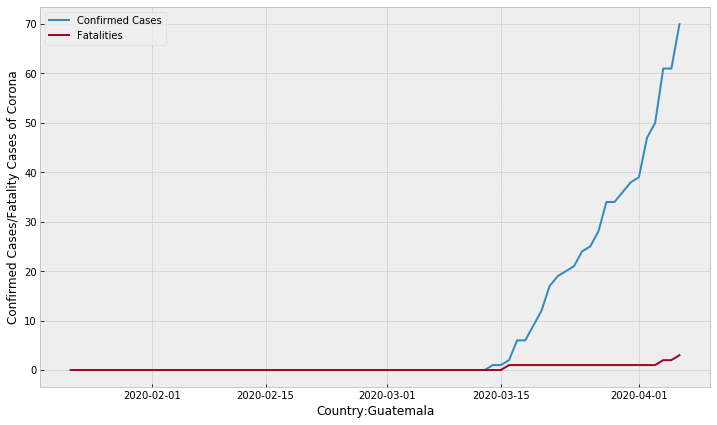

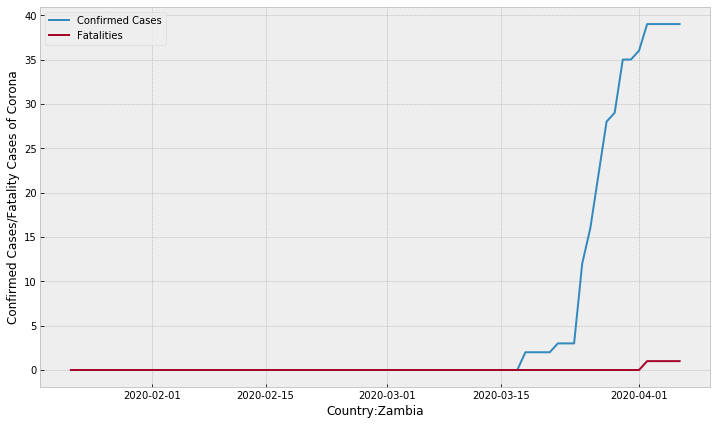

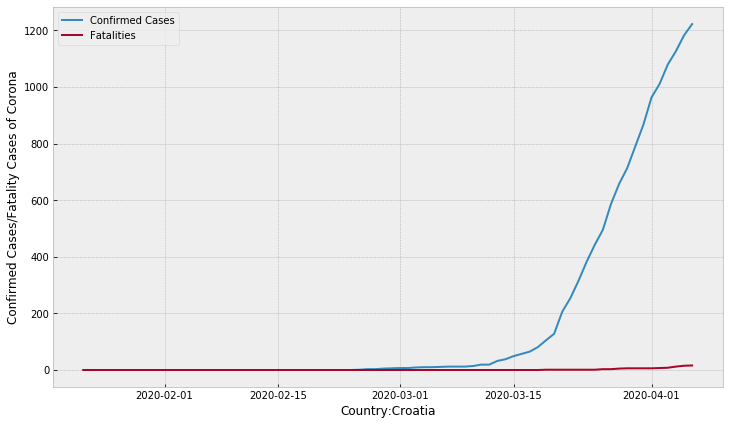

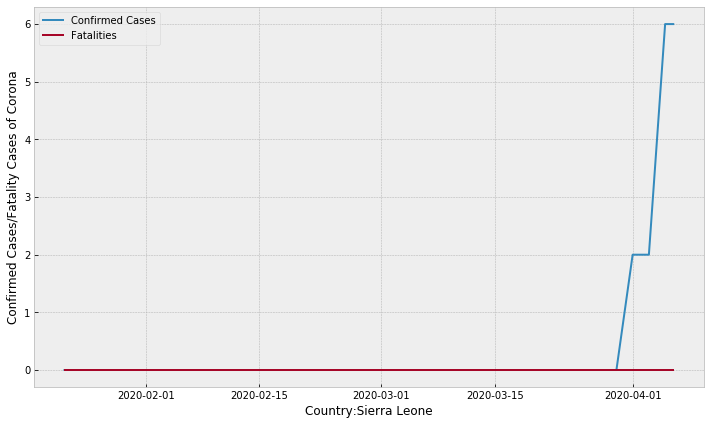

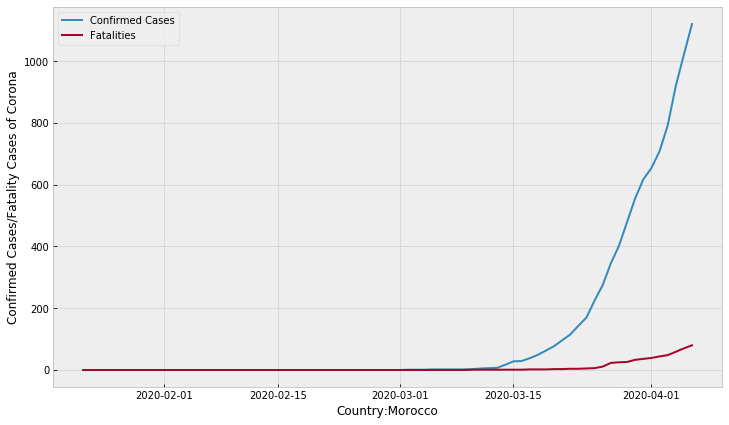

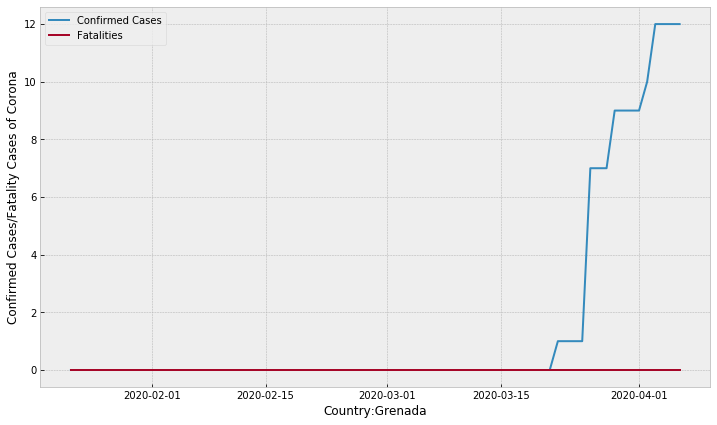

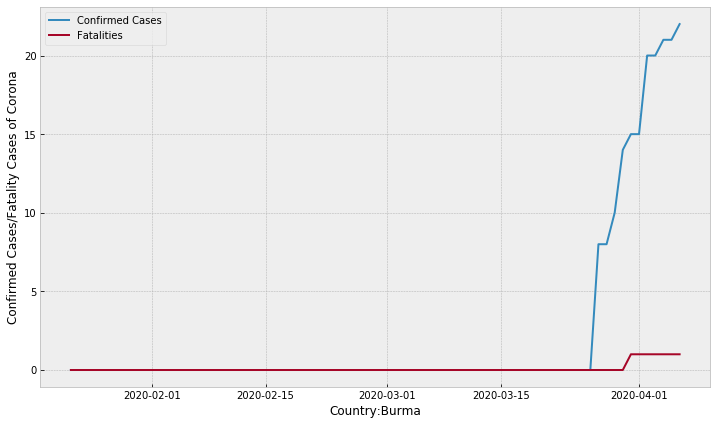

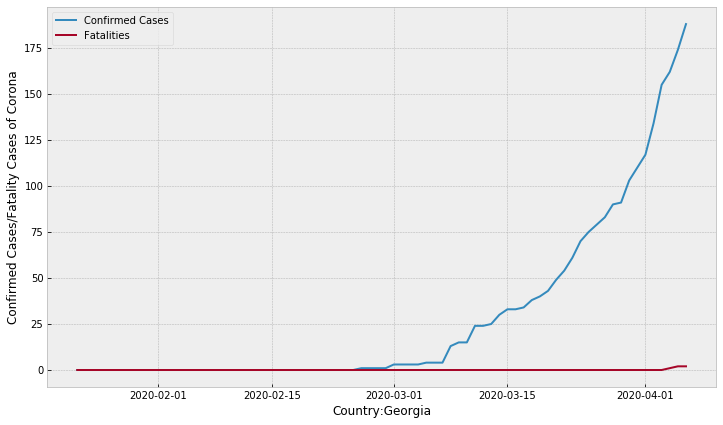

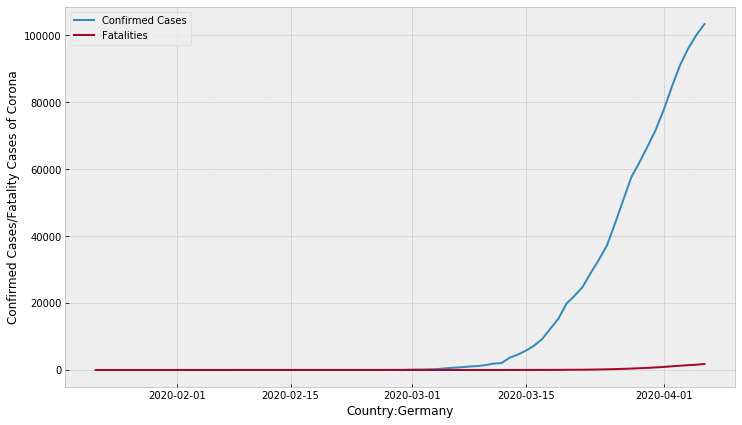

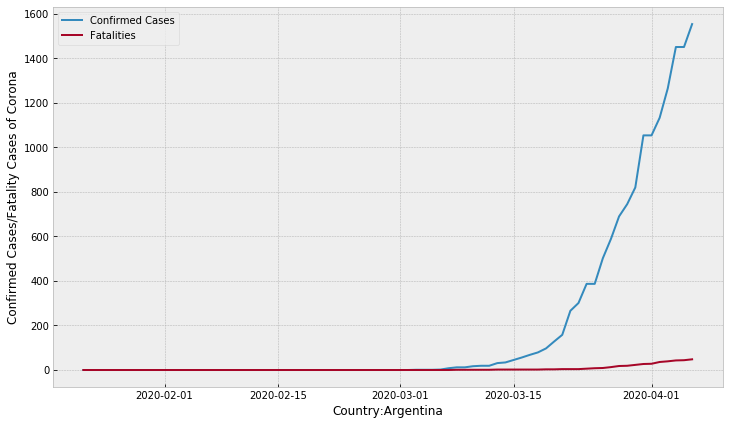

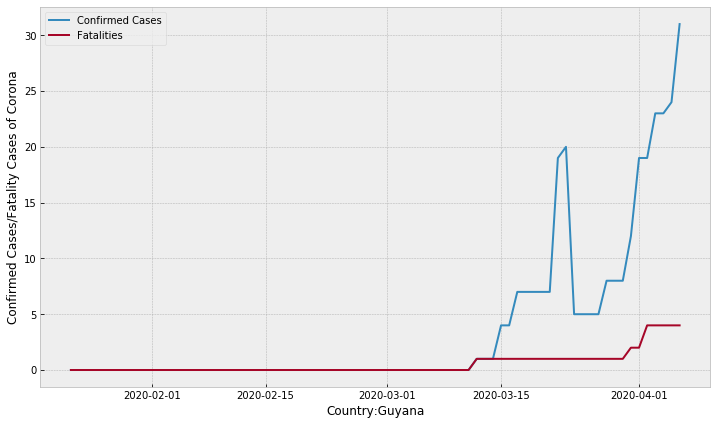

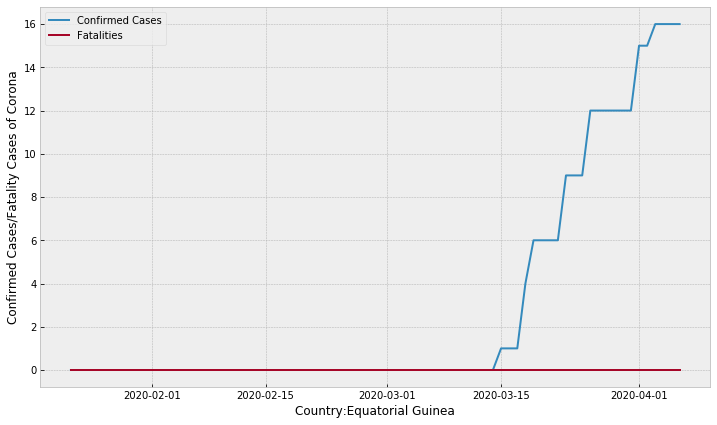

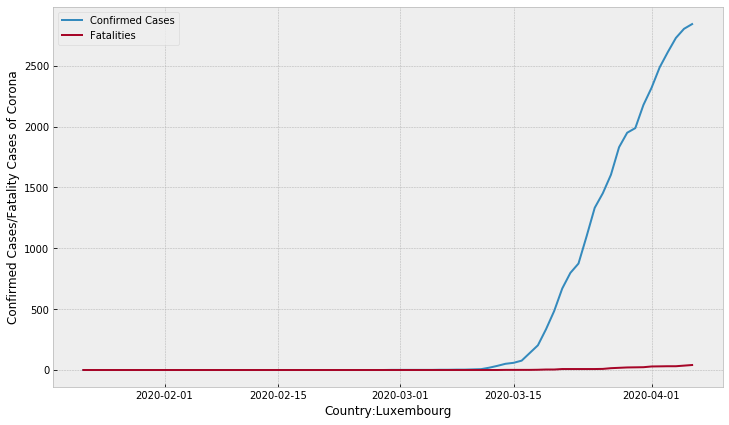

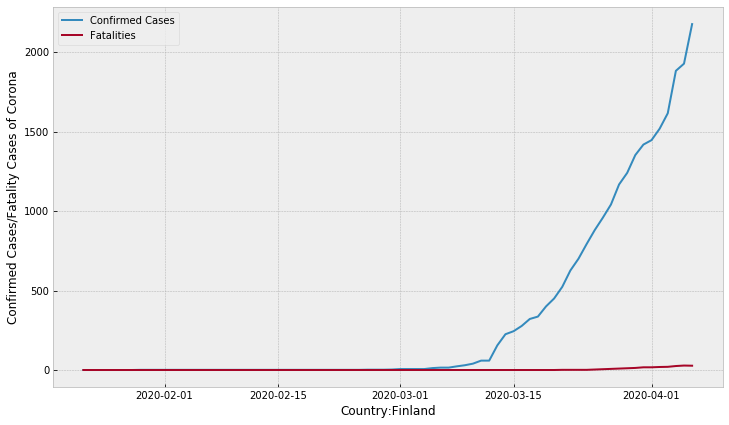

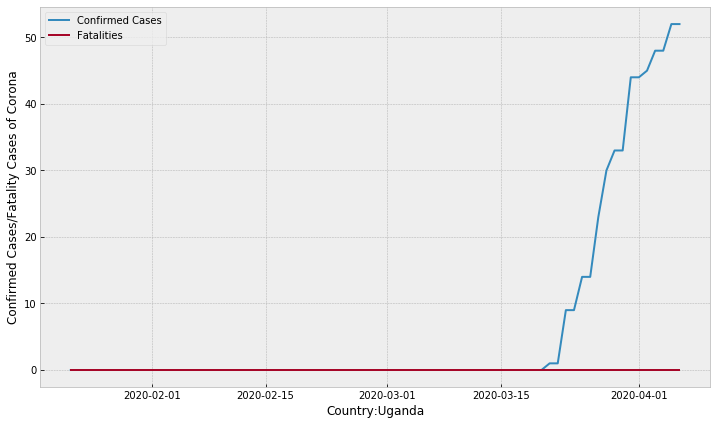

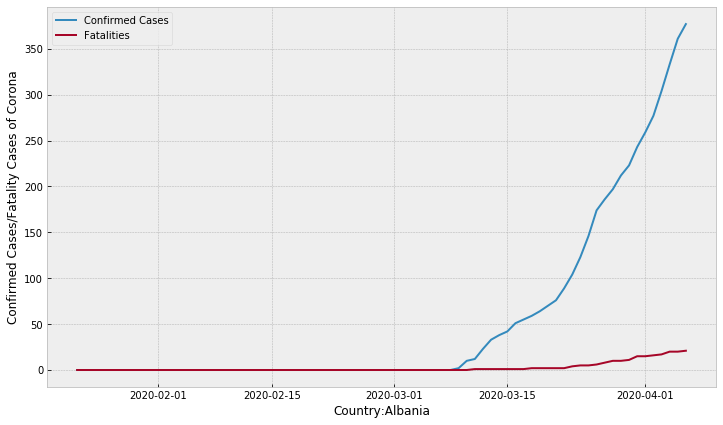

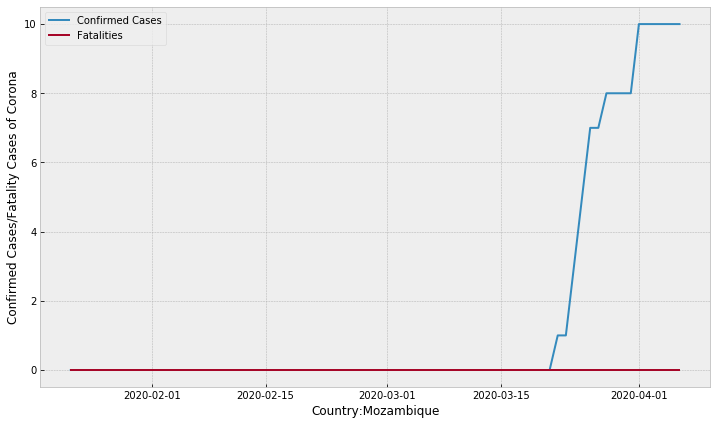

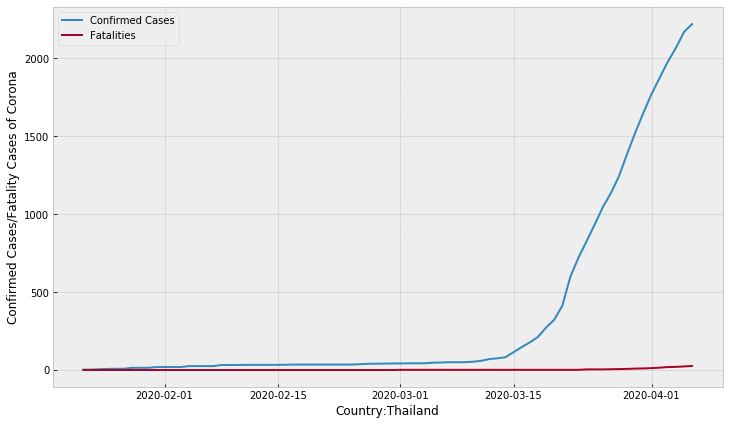

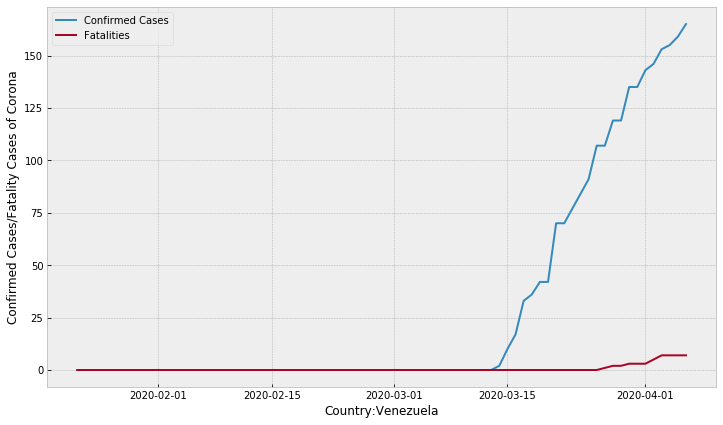

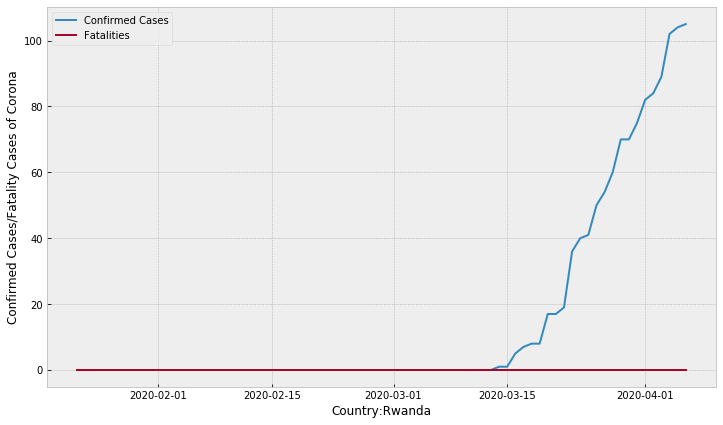

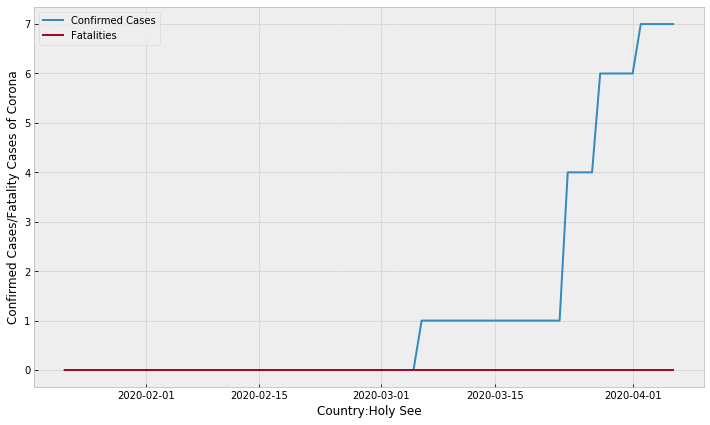

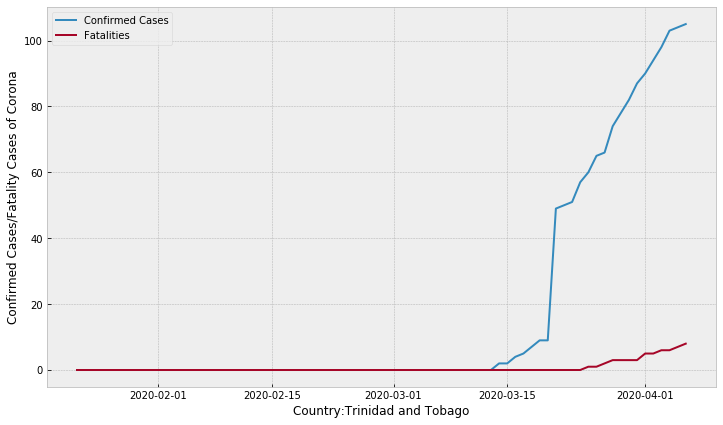

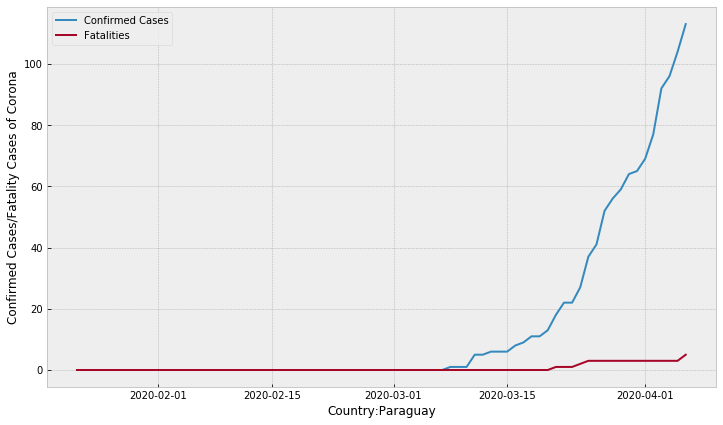

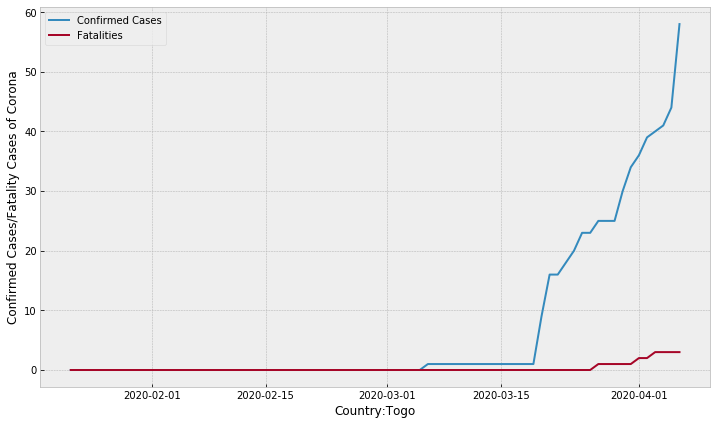

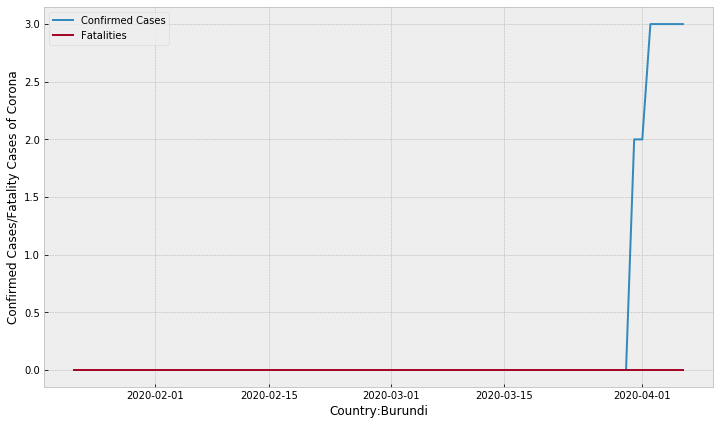

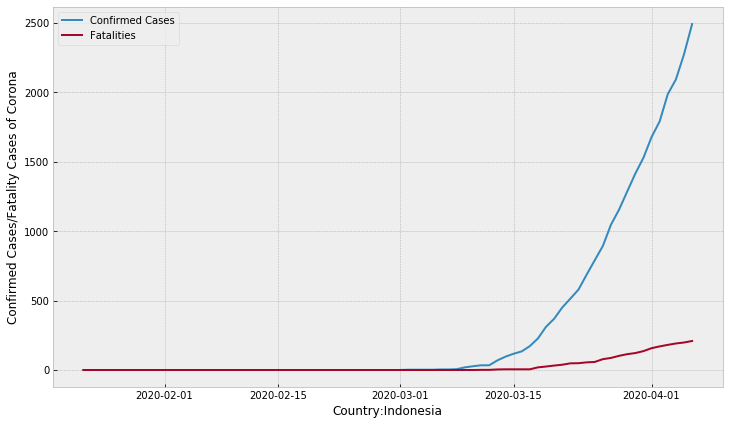

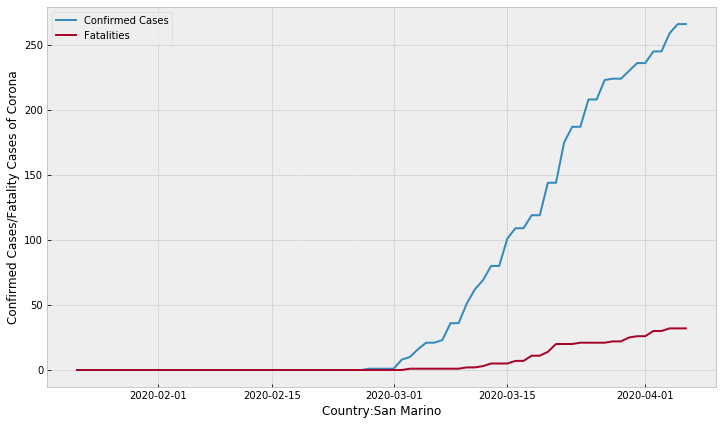

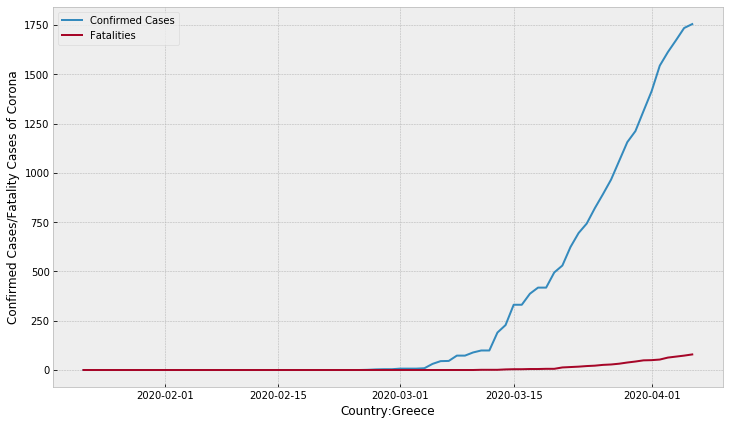

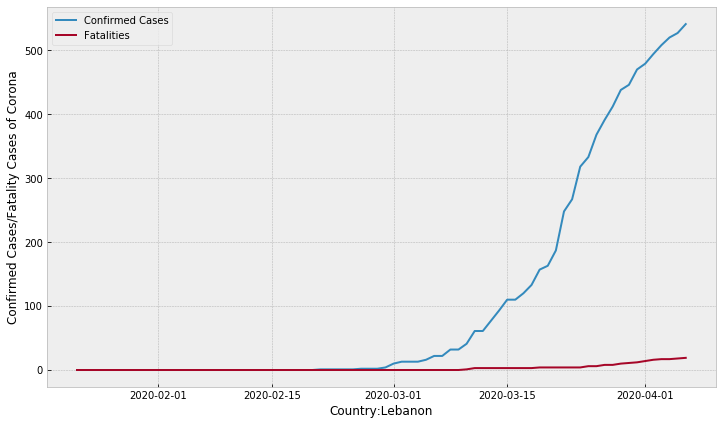

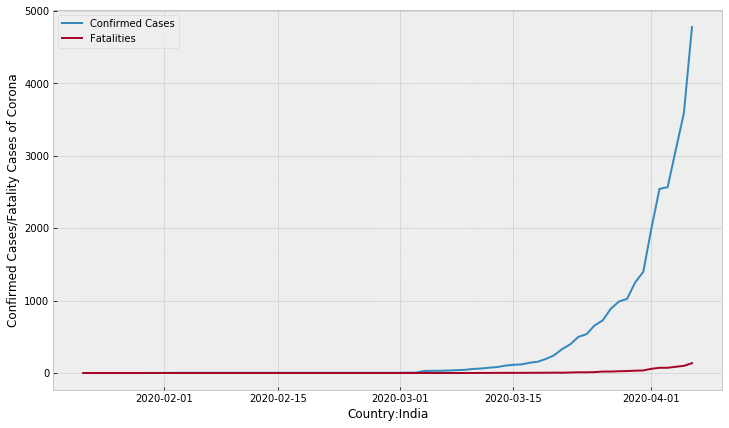

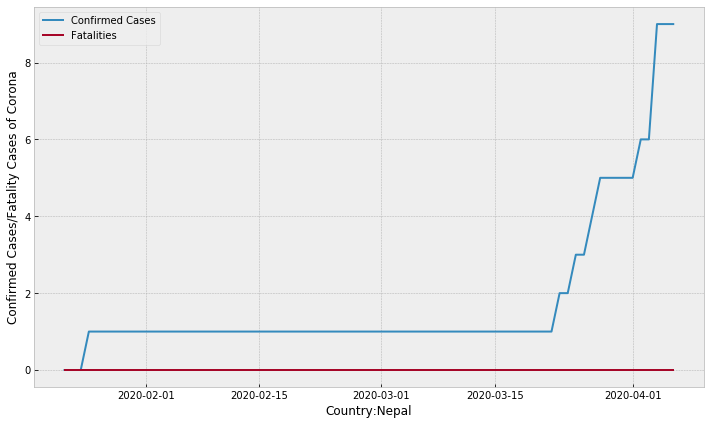

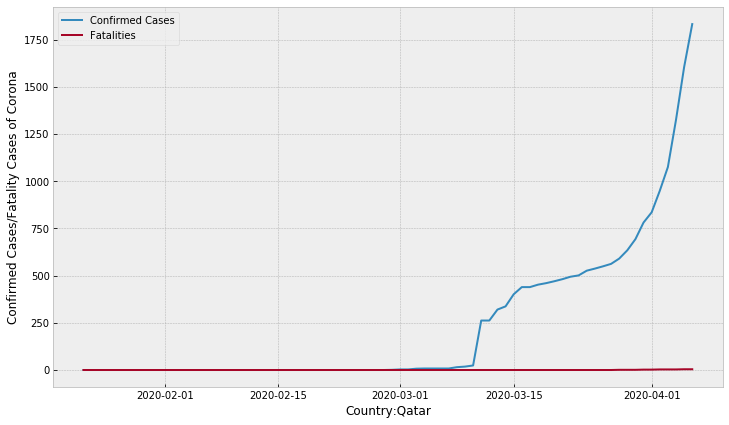

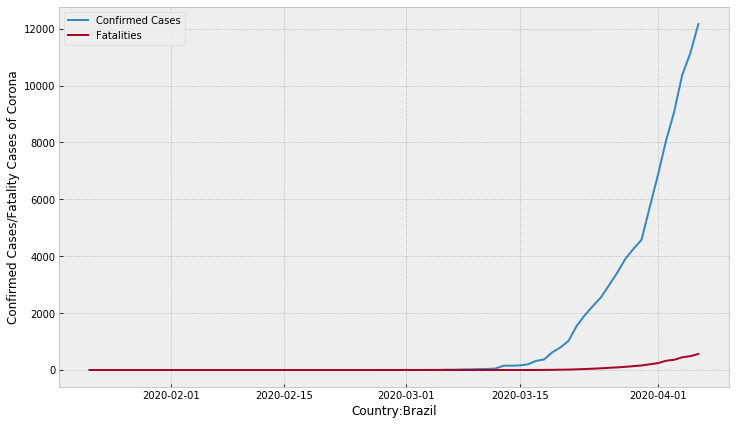

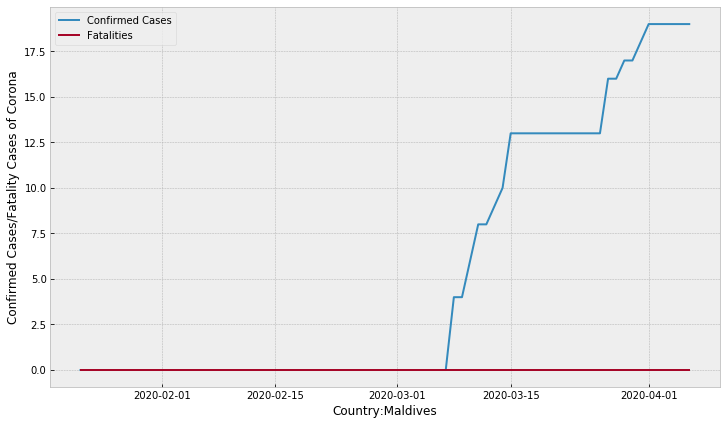

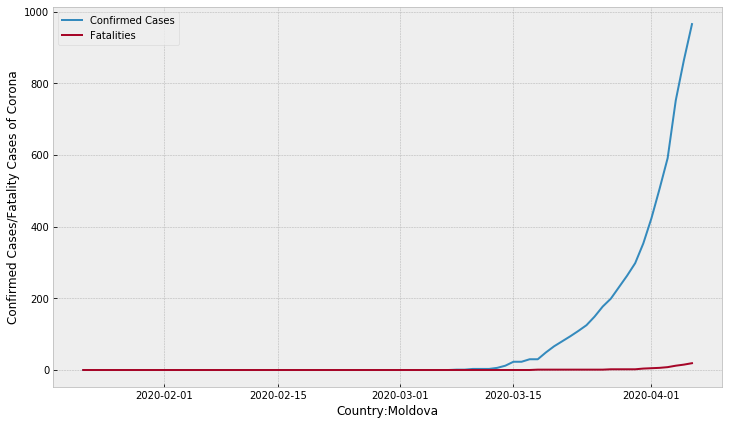

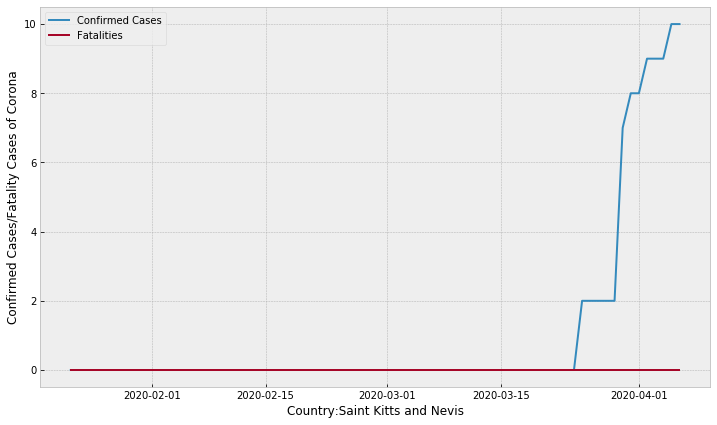

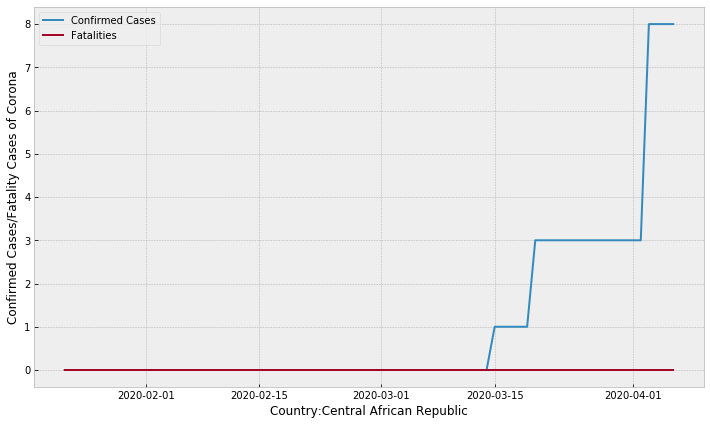

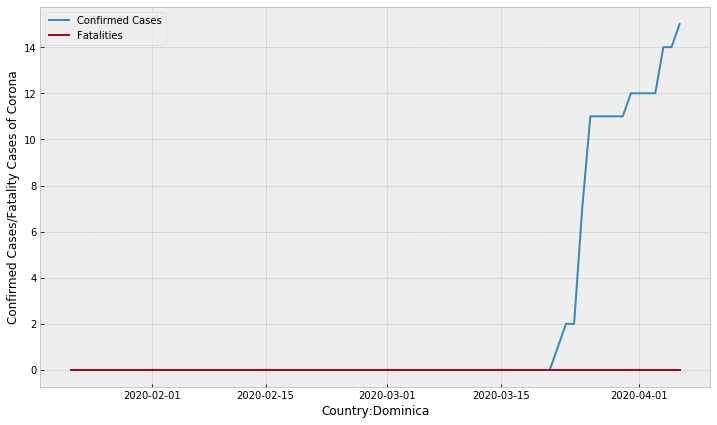

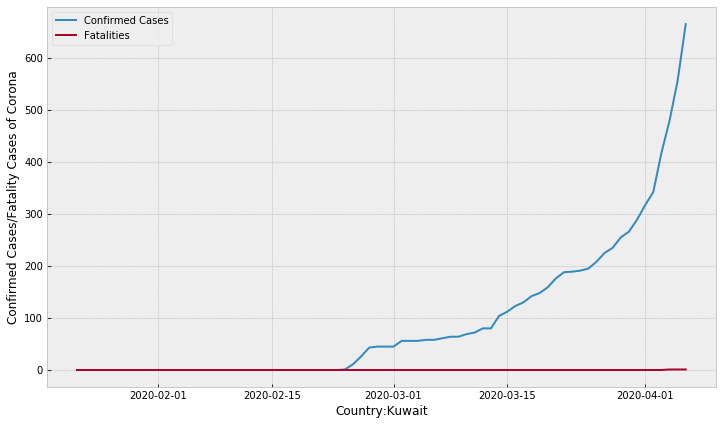

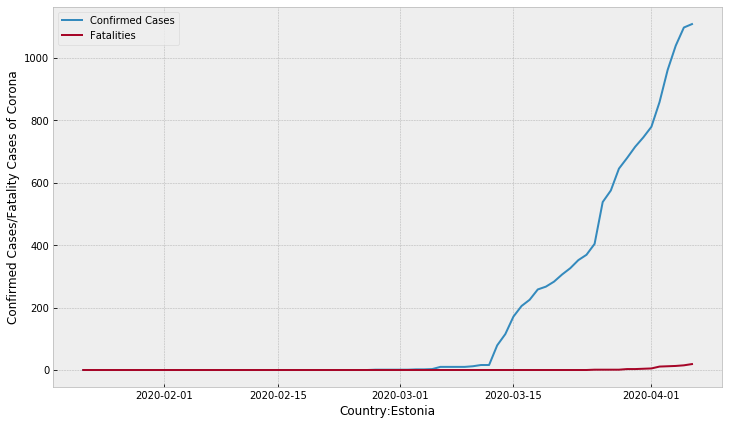

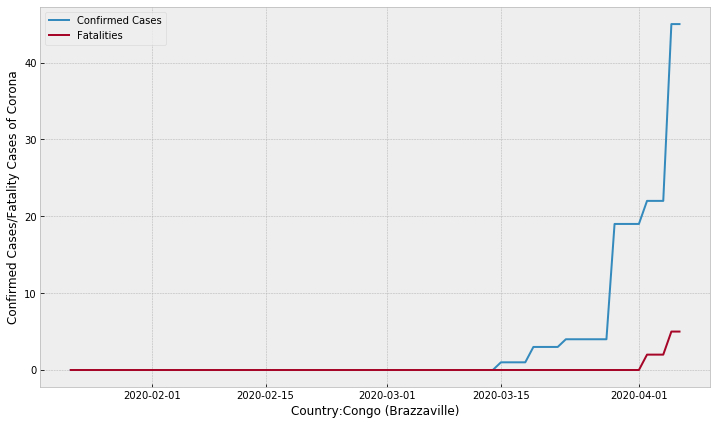

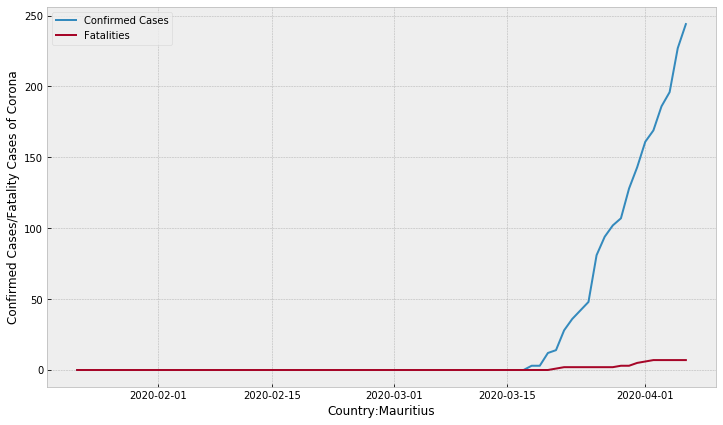

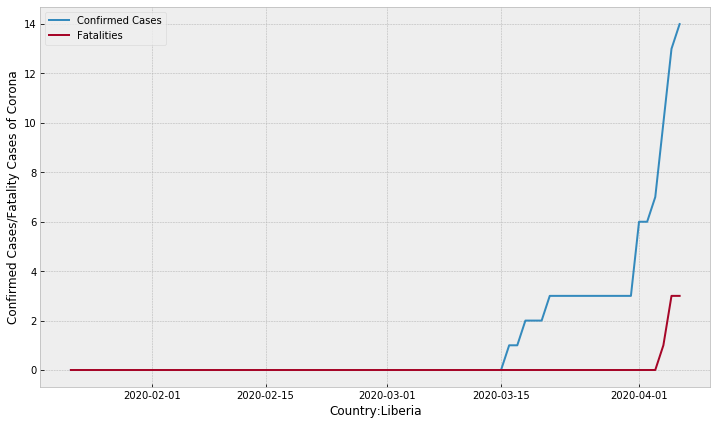

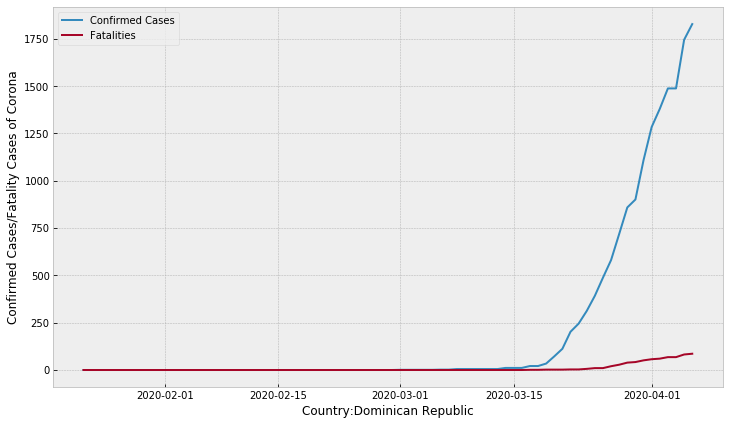

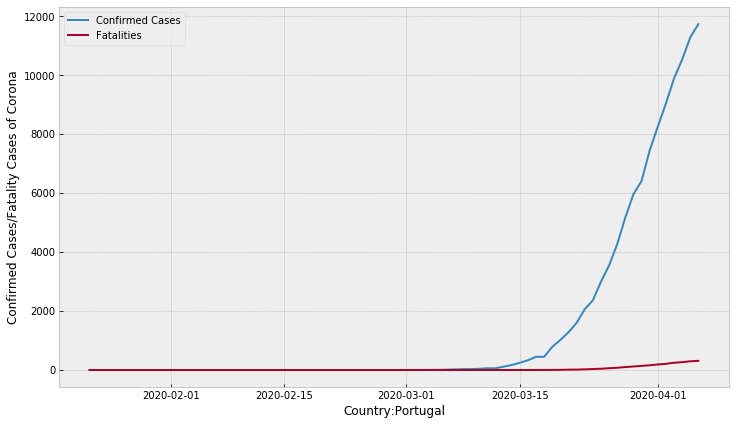

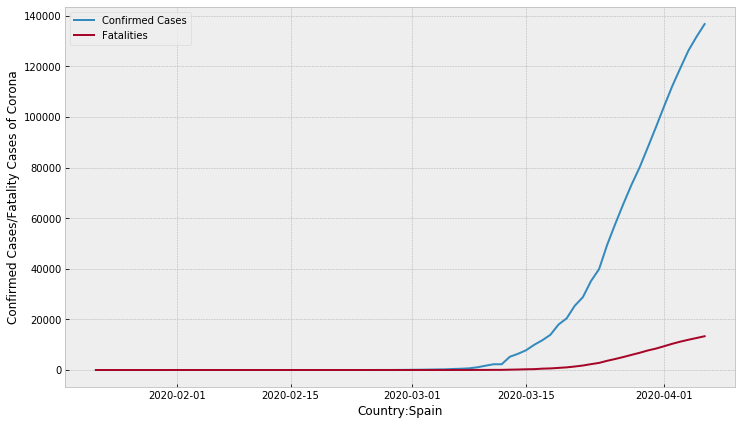

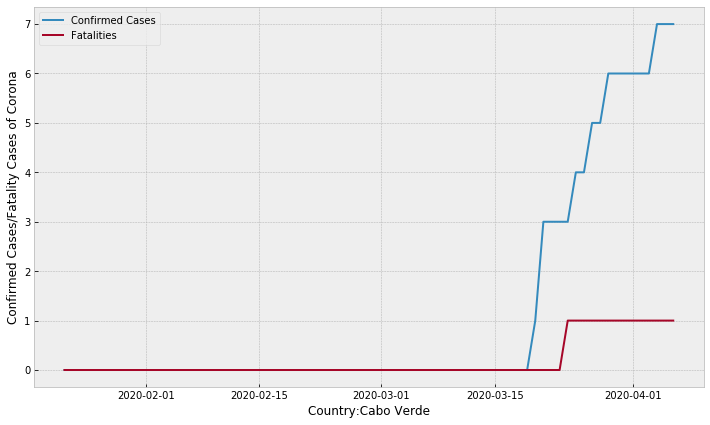

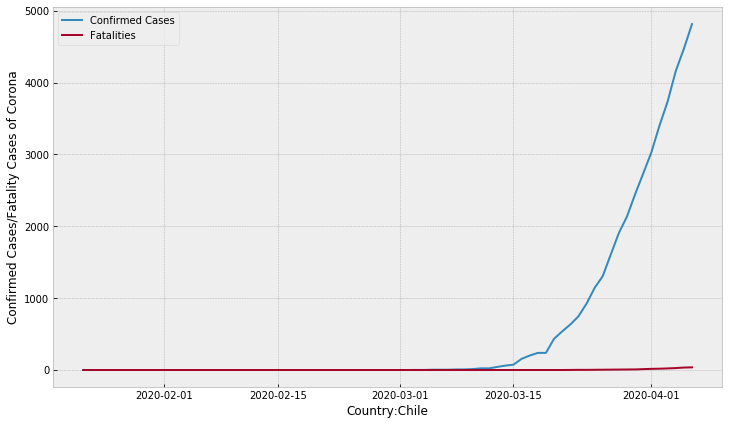

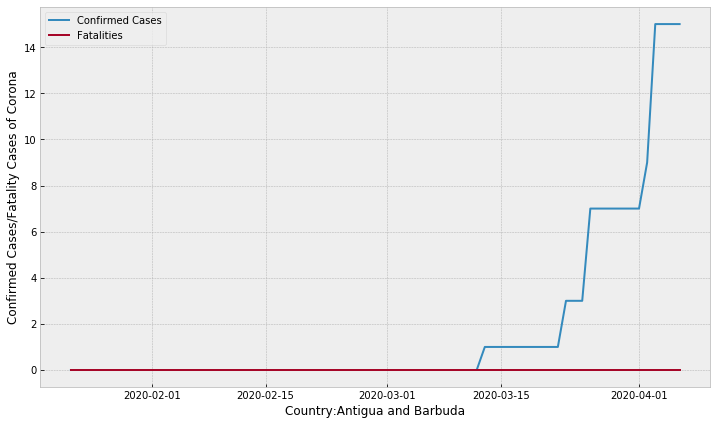

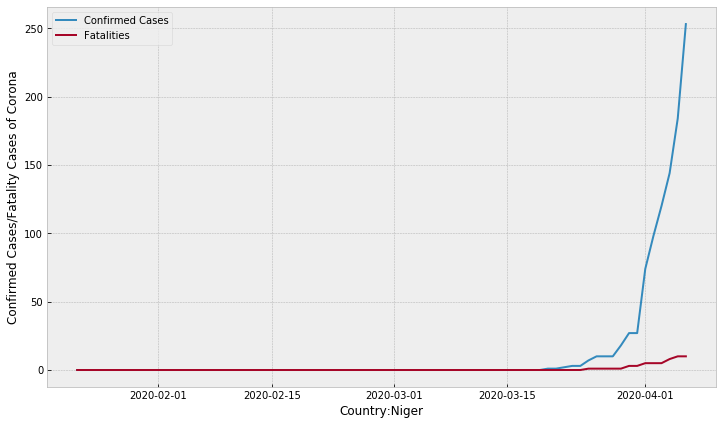

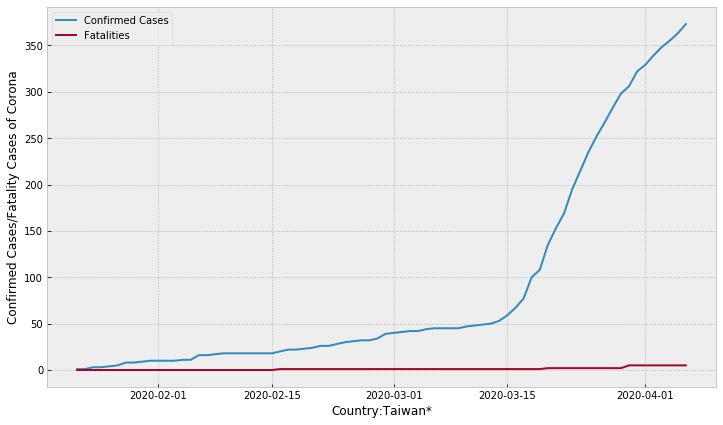

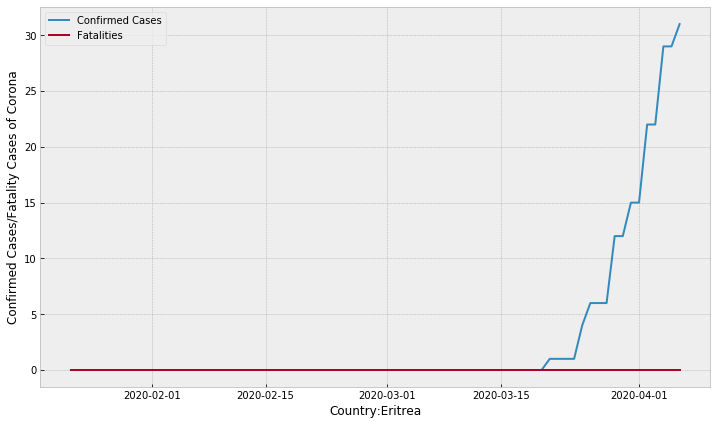

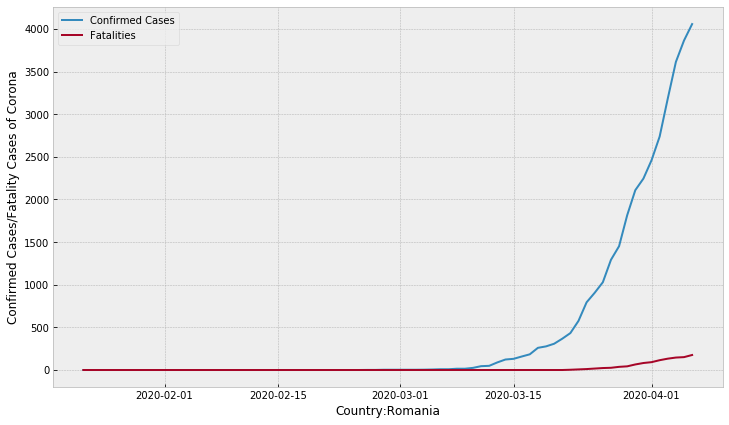

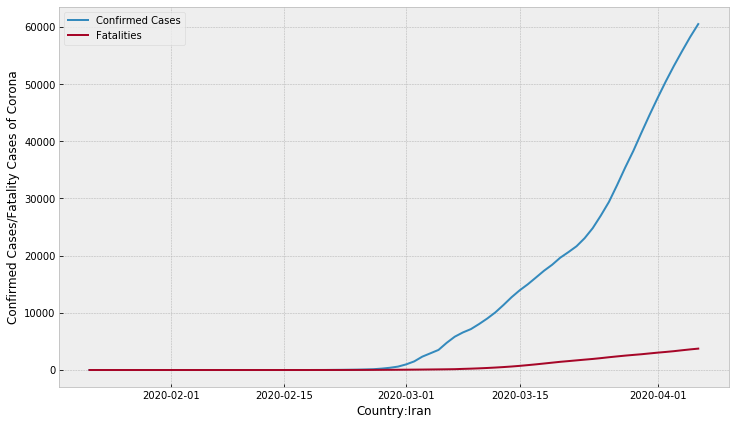

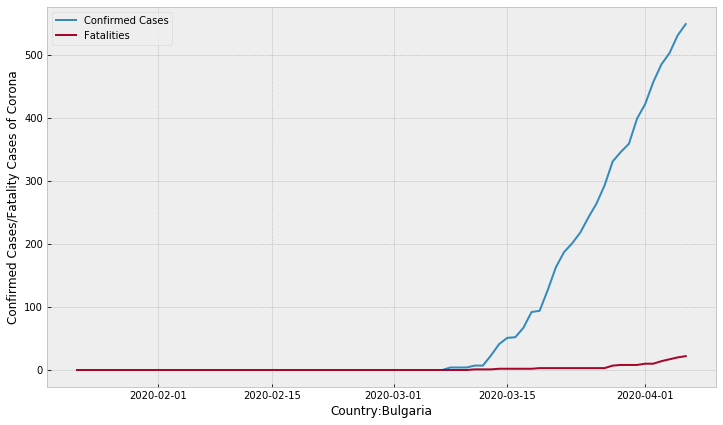

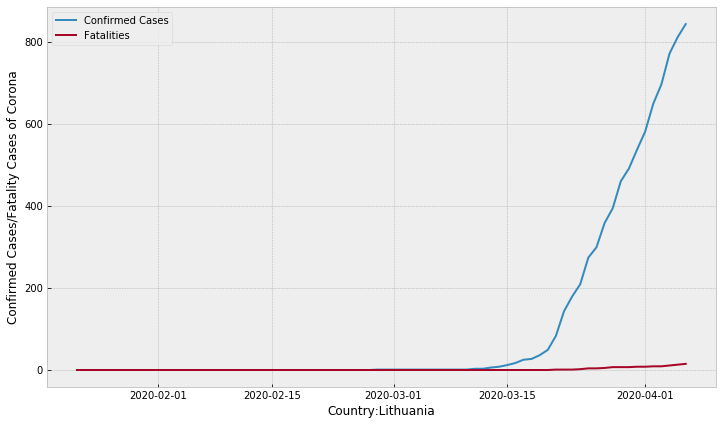

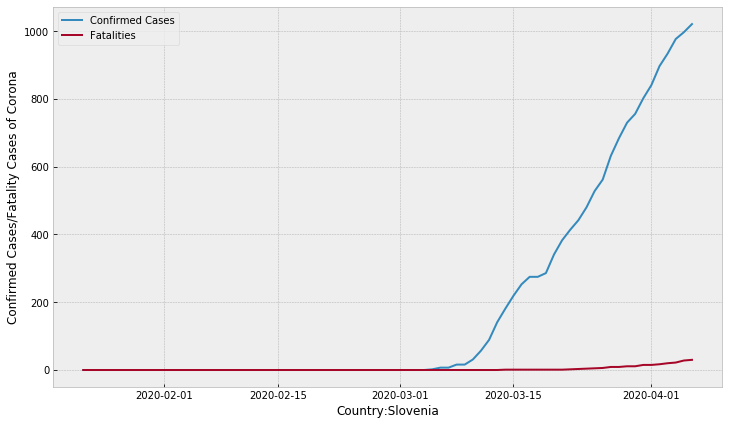

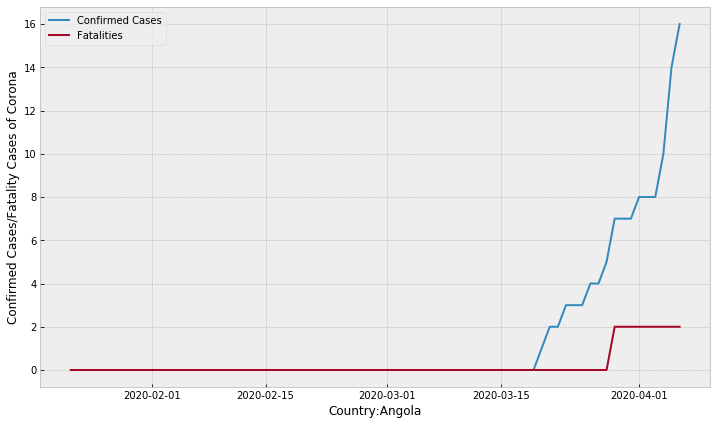

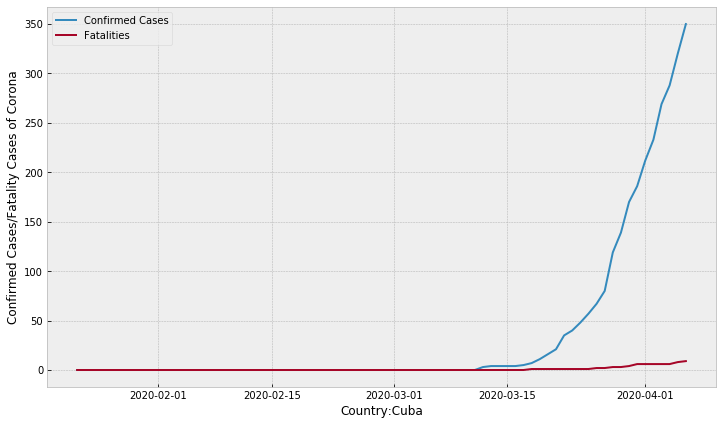

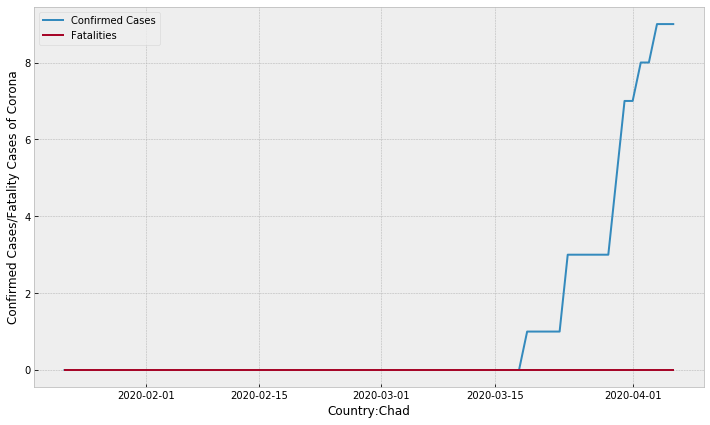

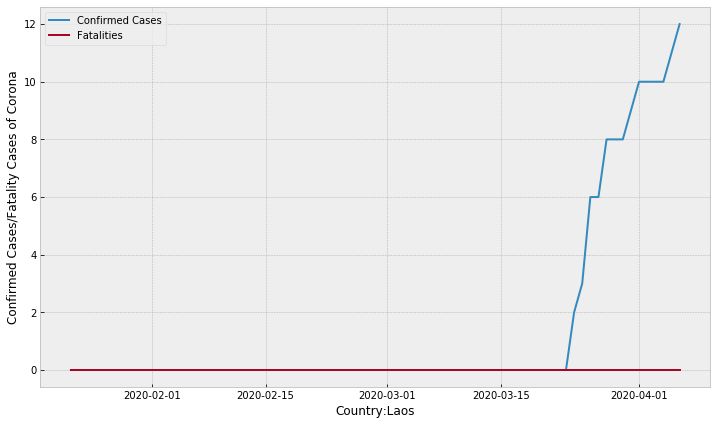

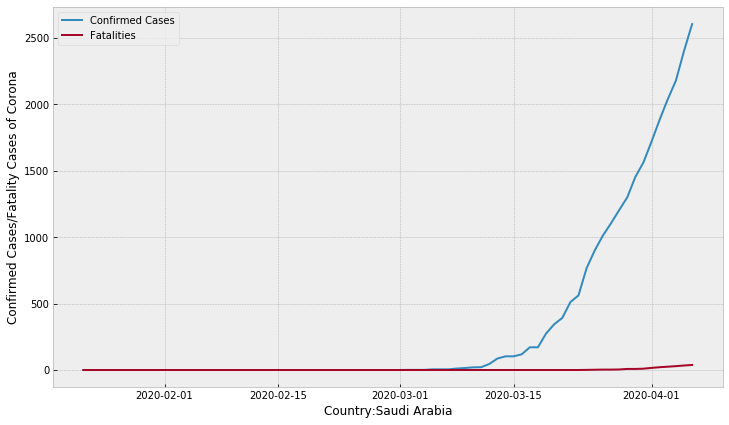

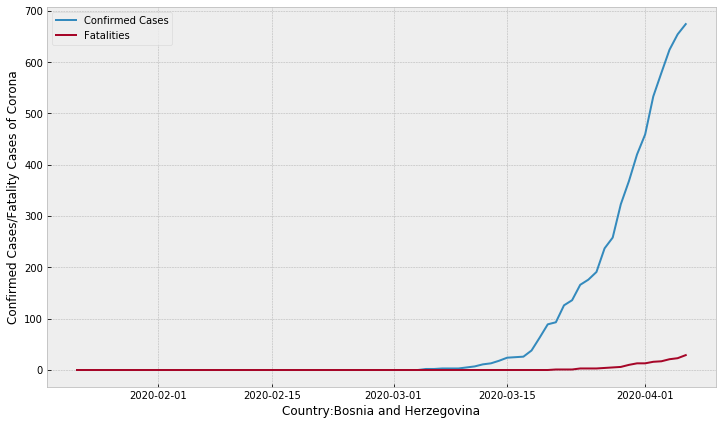

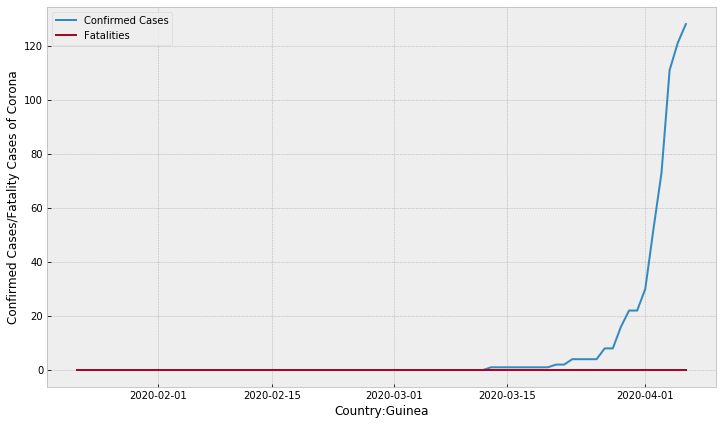

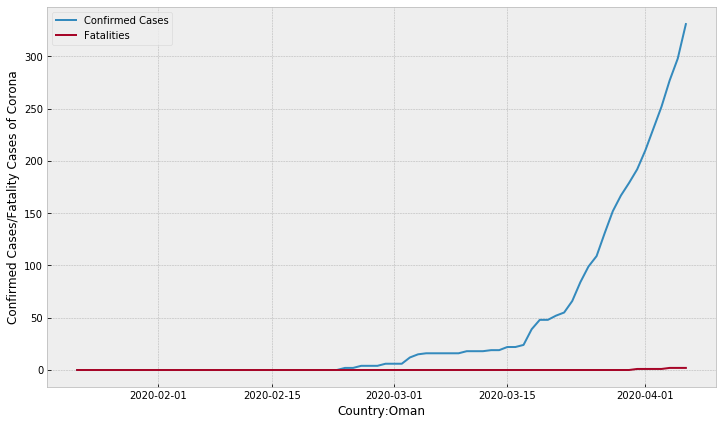

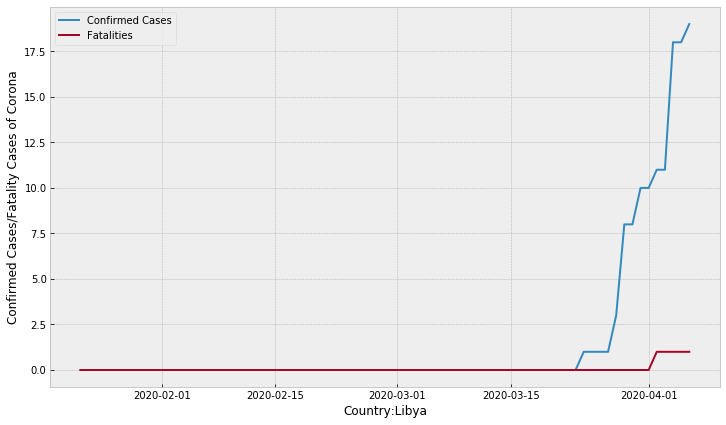

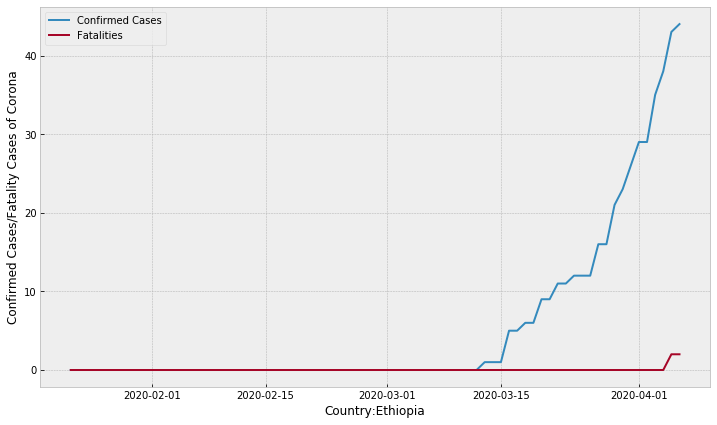

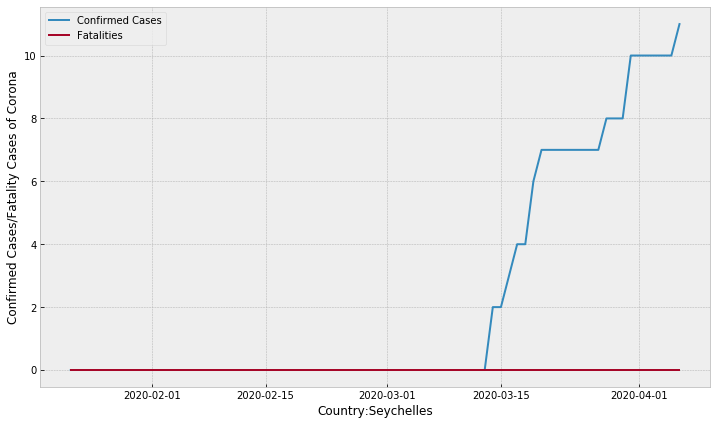

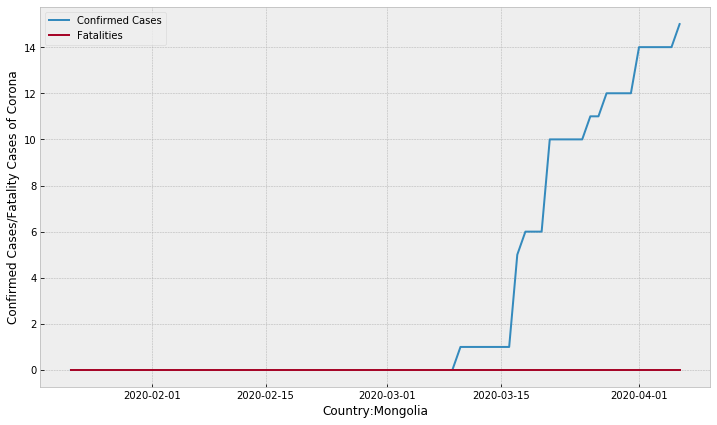

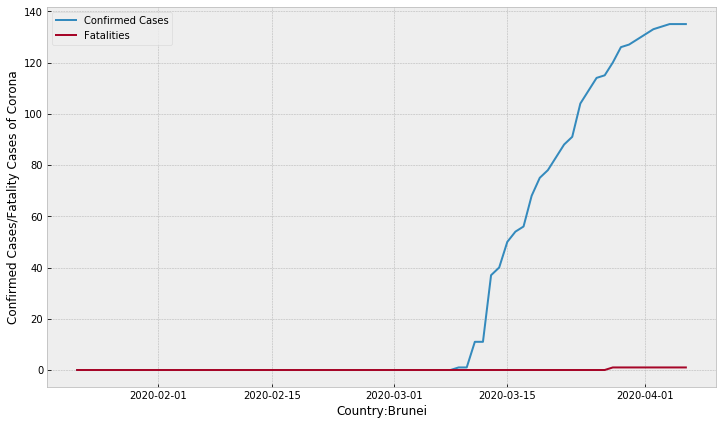

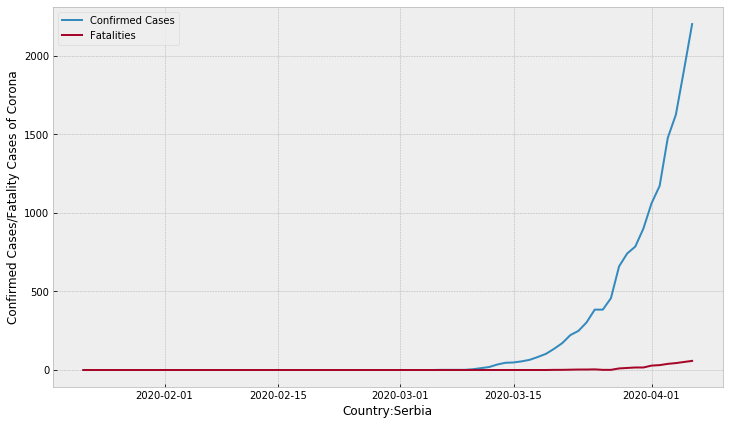

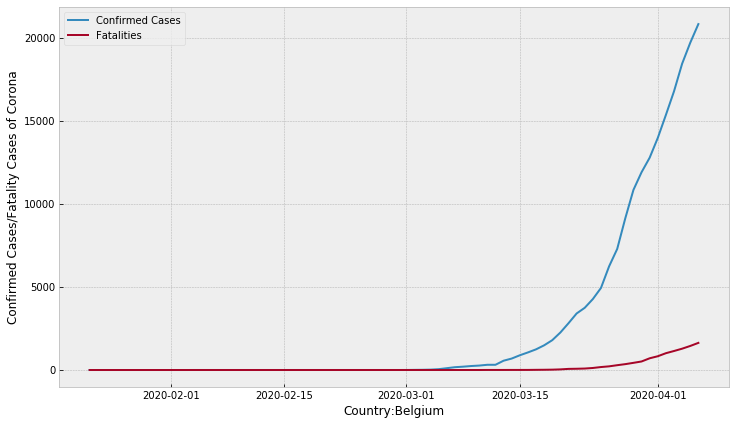

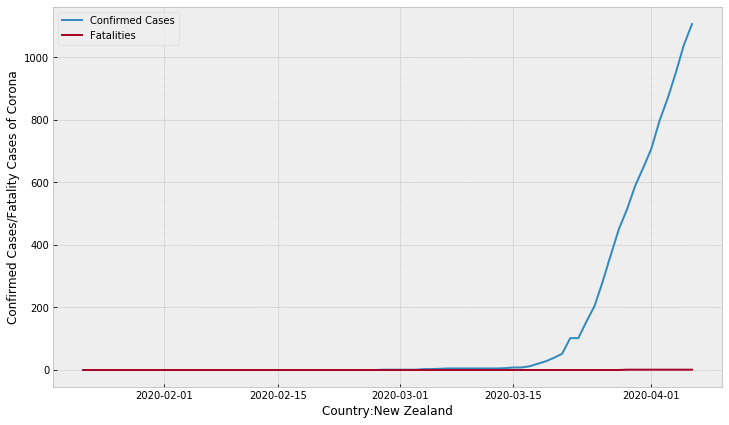

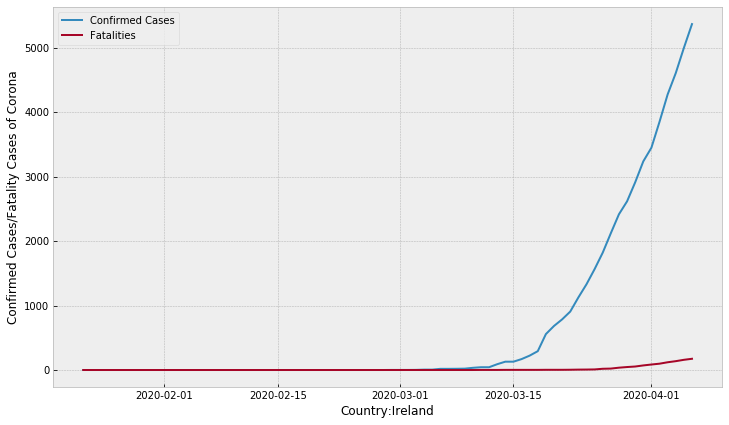

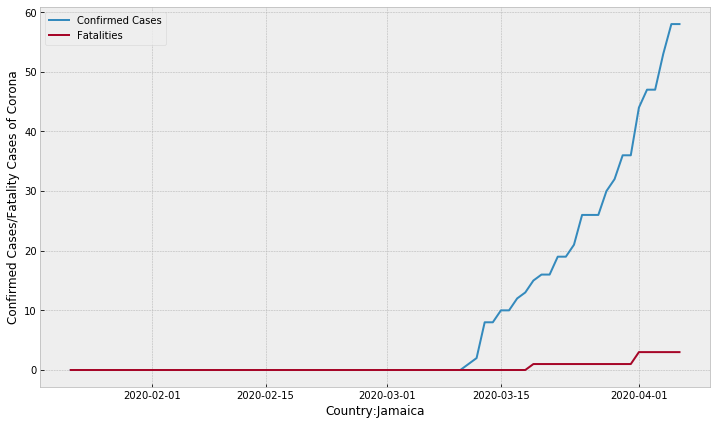

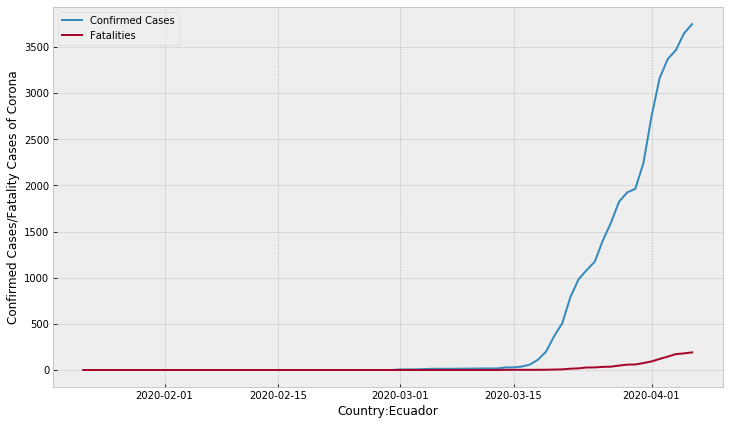

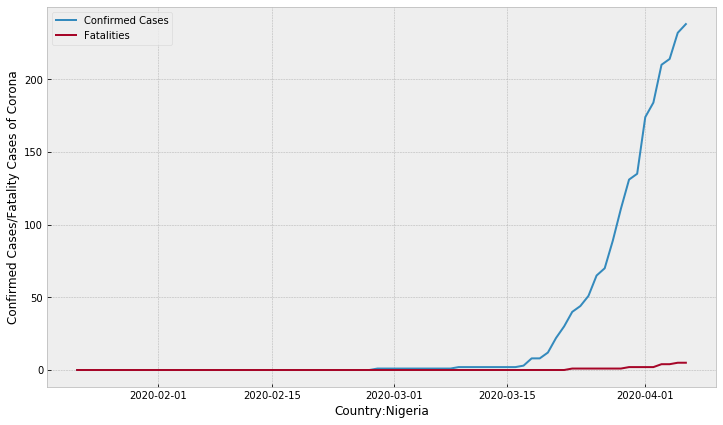

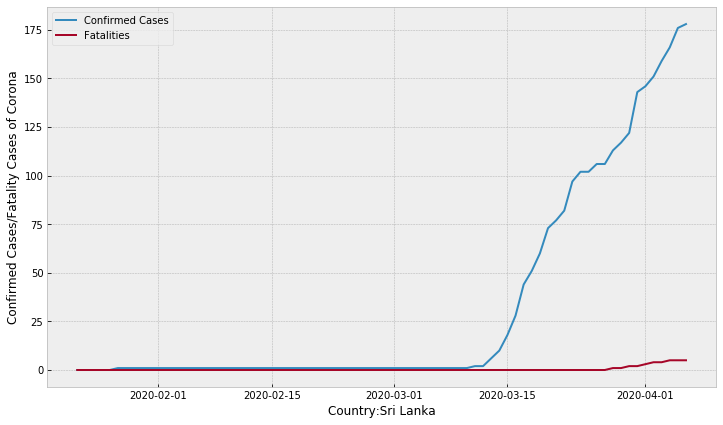

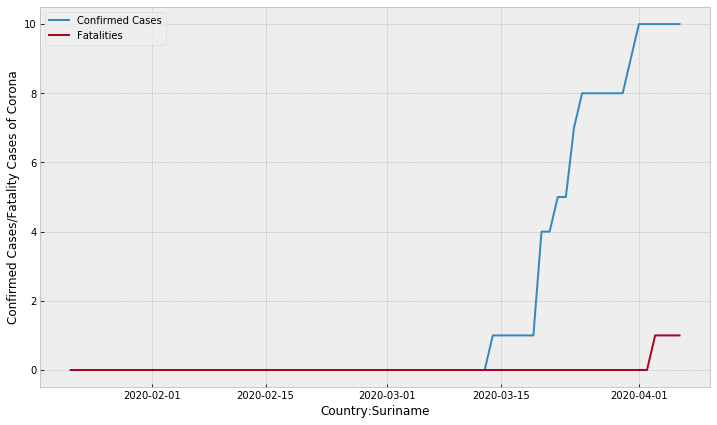

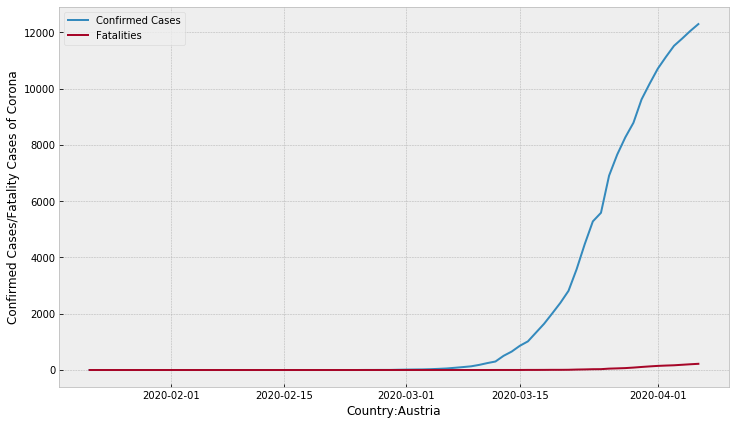

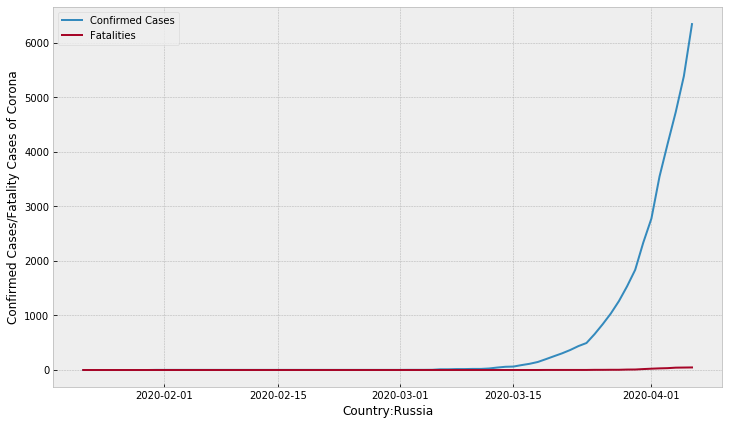

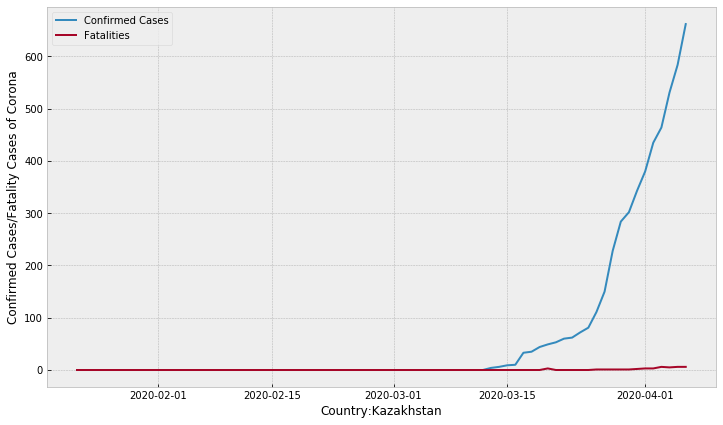

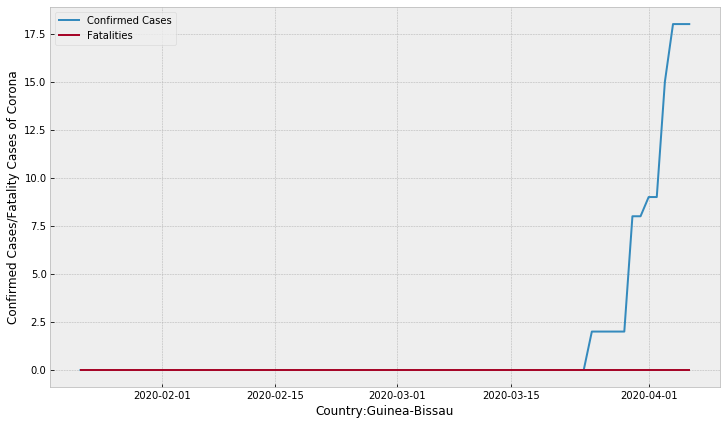

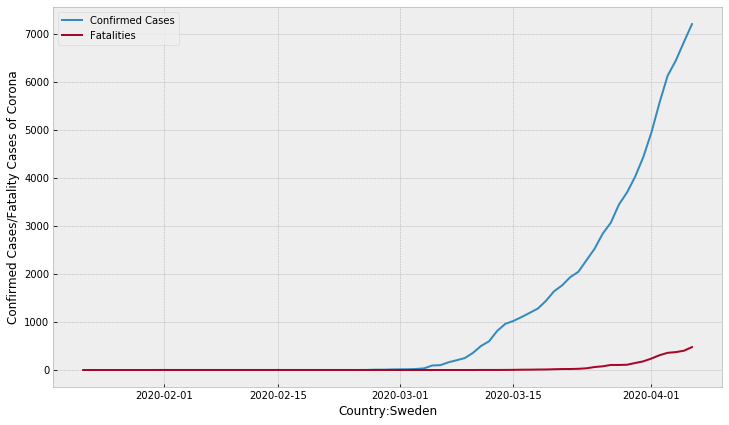

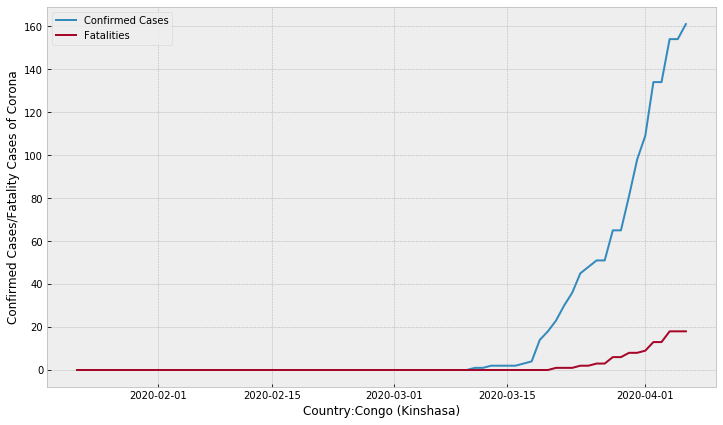

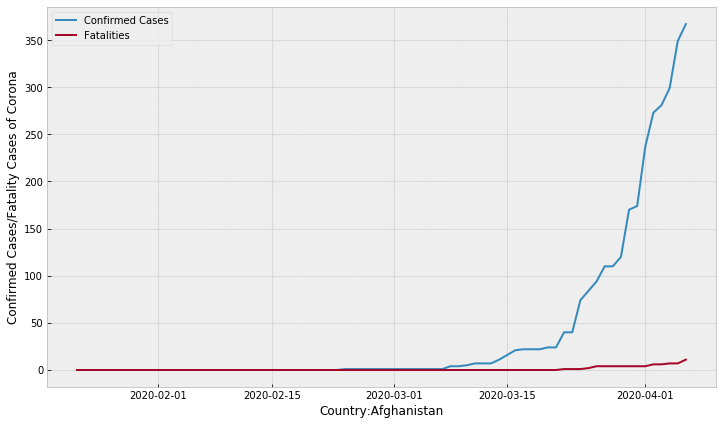

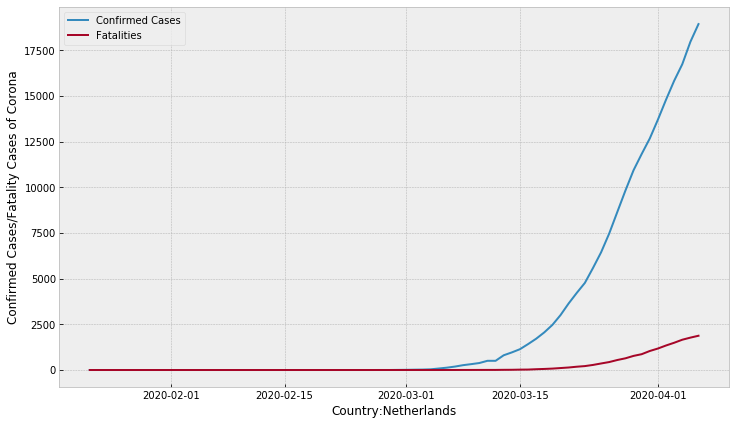

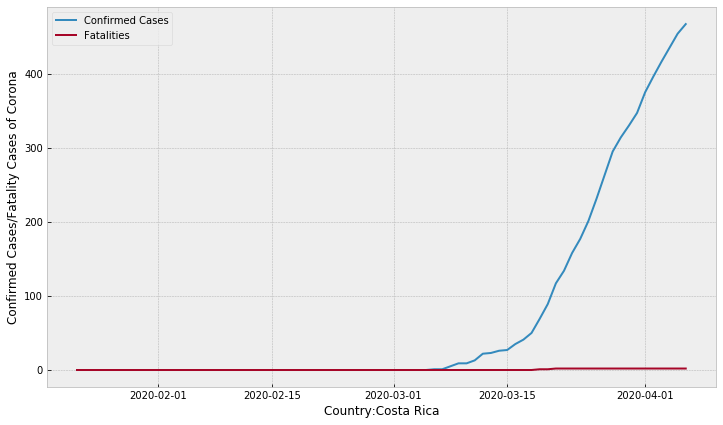

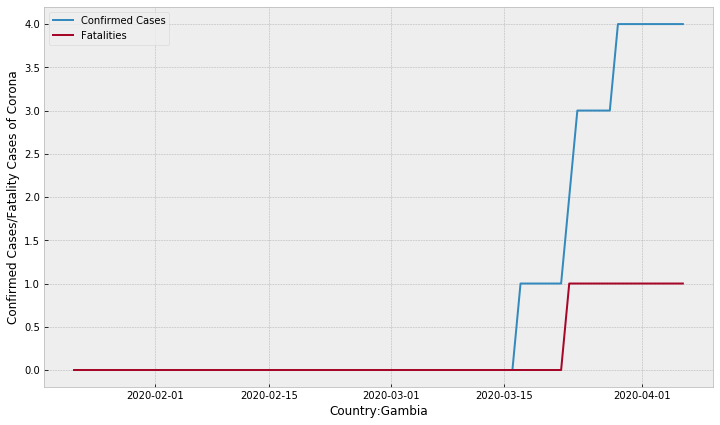

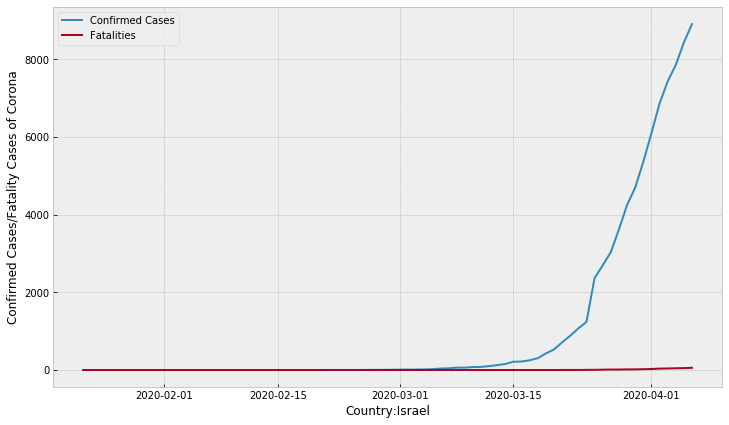

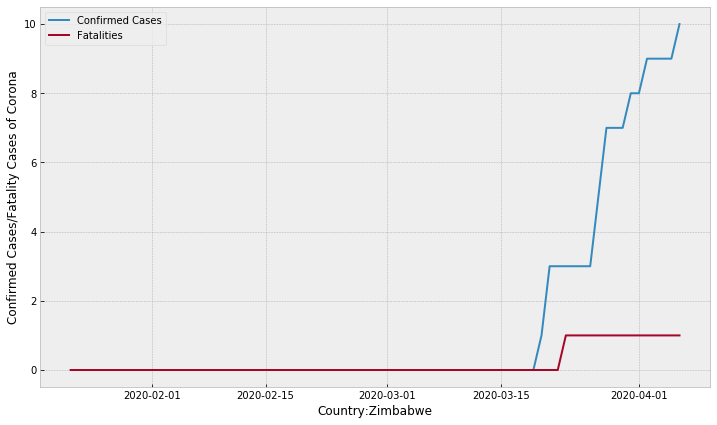

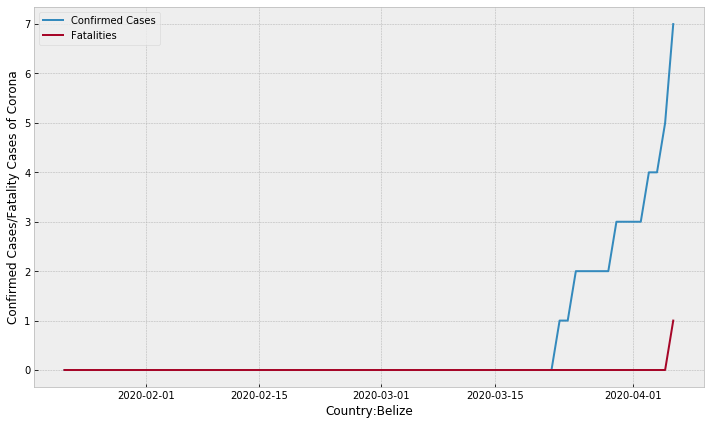

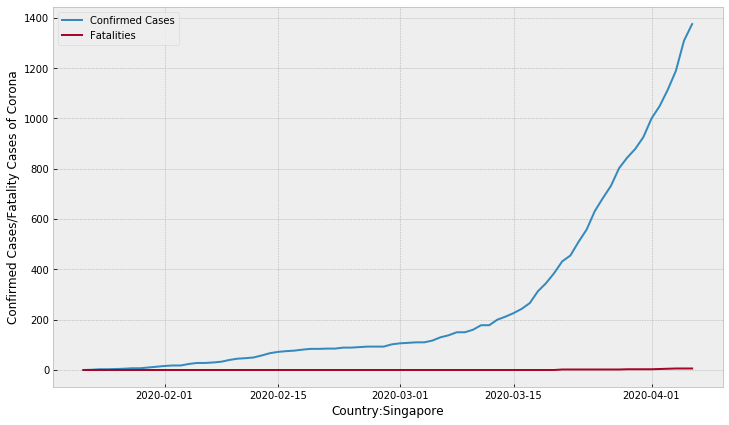

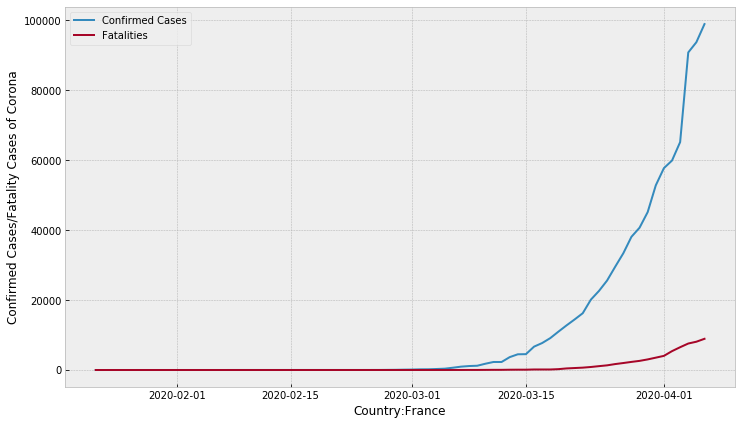

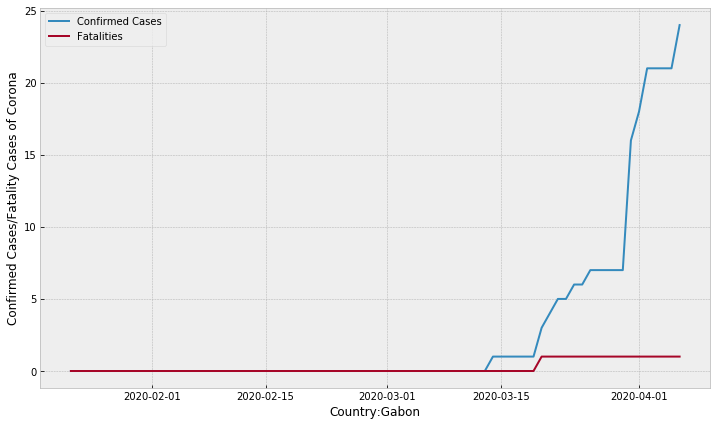

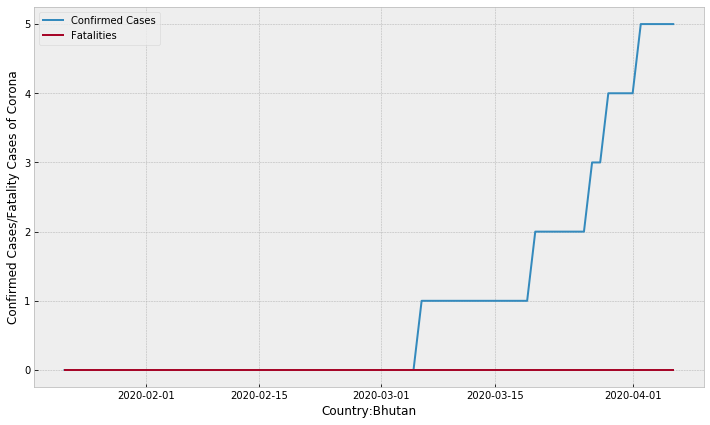

In [10]:
for iv in train['Country_Region'].value_counts().index:
    plt.figure(figsize=(12, 7))
    plt.plot(train[train['Country_Region']==iv].ConfirmedCases,label='Confirmed Cases')
    plt.plot(train[train['Country_Region']==iv].Fatalities,label='Fatalities')

    plt.xlabel('Country:{}'.format(iv))
    plt.ylabel('Confirmed Cases/Fatality Cases of Corona')
    plt.legend(loc=0)
    
    plt.show()
    

In [11]:
ser3 = train.groupby('Country_Region')['ConfirmedCases', 'Fatalities'].sum()

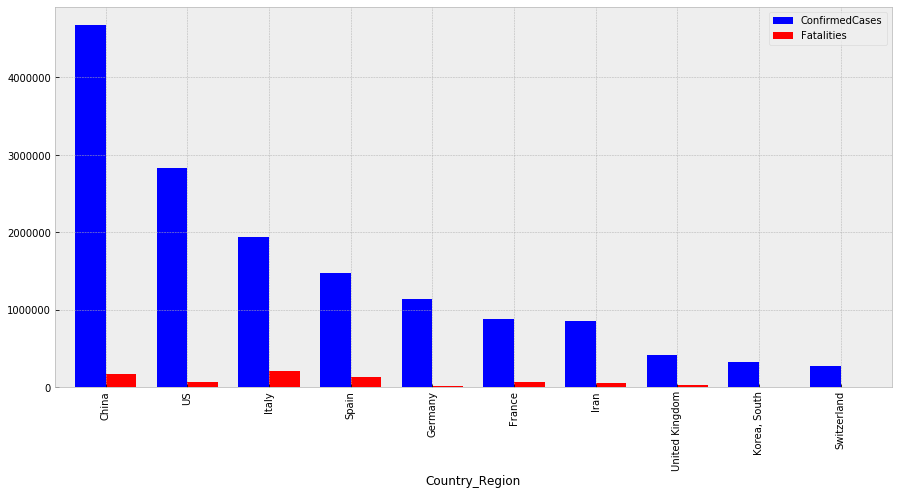

In [12]:
ser3.sort_values('ConfirmedCases',ascending=False).head(10).plot(kind = 'bar',width=0.75,color=['b','r'],figsize=(15,7))
plt.show()

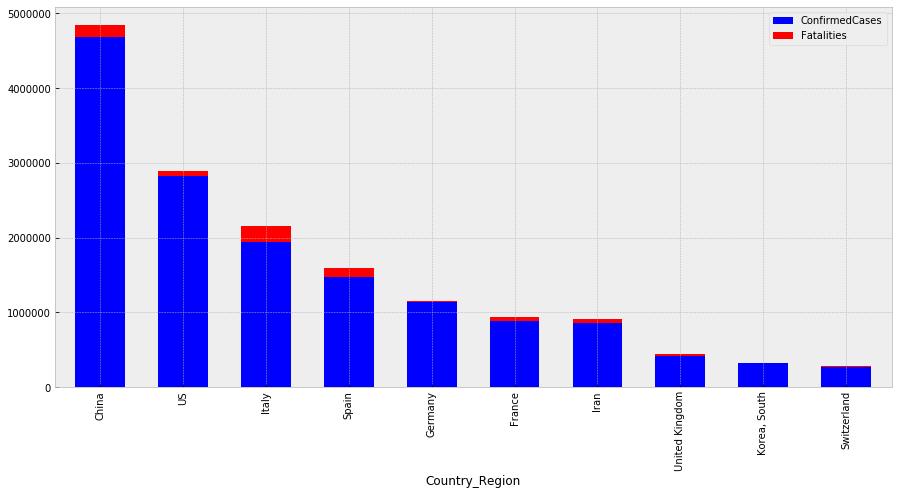

In [13]:
ser3.sort_values('ConfirmedCases',ascending=False).head(10).plot(kind = 'bar', stacked = True,width=0.6,color=['b','r'],figsize=(15,7))
plt.show()

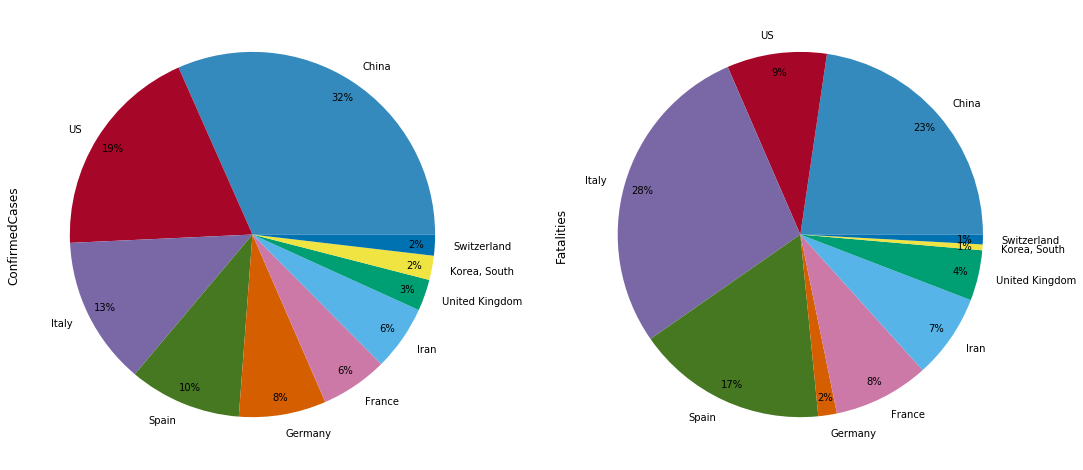

In [111]:
ser3.sort_values('ConfirmedCases',ascending=False).head(10).plot(kind = 'pie',subplots=True,legend=False,figsize=(18,18),autopct='%1.0f%%',pctdistance=0.9)

plt.show()


In [112]:
train.head()

Country_Region  ConfirmedCases  Fatalities
Date                                                 
2020-01-22    Afghanistan             0.0         0.0
2020-01-23    Afghanistan             0.0         0.0
2020-01-24    Afghanistan             0.0         0.0
2020-01-25    Afghanistan             0.0         0.0
2020-01-26    Afghanistan             0.0         0.0

In [113]:
def rollingmean(df,Country):
    train_ts=df[df['Country_Region']==Country]['ConfirmedCases']
    fig, axes = plt.subplots(2, 2)
    fig.set_figwidth(14)
    fig.set_figheight(8)
    axes[0][0].plot(train_ts.index, train_ts, label='Original')
    axes[0][0].plot(train_ts.index, train_ts.rolling(window=2).mean(), label='2-days Rolling Mean')
    axes[0][0].set_xlabel("Years")
    axes[0][0].set_ylabel("Confirmed cases of Corona")
    axes[0][0].set_title("2-days Moving Average")
    axes[0][0].legend(loc='best')

    axes[0][1].plot(train_ts.index, train_ts, label='Original')
    axes[0][1].plot(train_ts.index, train_ts.rolling(window=3).mean(), label='3-days Rolling Mean')
    axes[0][1].set_xlabel("Years")
    axes[0][1].set_ylabel("Confirmed cases of Corona")
    axes[0][1].set_title("3-days Moving Average")
    axes[0][1].legend(loc='best')

    axes[1][0].plot(train_ts.index, train_ts, label='Original')
    axes[1][0].plot(train_ts.index, train_ts.rolling(window=4).mean(), label='4-days Rolling Mean')
    axes[1][0].set_xlabel("Years")
    axes[1][0].set_ylabel("Confirmed cases of Corona")
    axes[1][0].set_title("4-days Moving Average")
    axes[1][0].legend(loc='best')

    axes[1][1].plot(train_ts.index, train_ts, label='Original')
    axes[1][1].plot(train_ts.index, train_ts.rolling(window=5).mean(), label='5-days Rolling Mean')
    axes[1][1].set_xlabel("Years")
    axes[1][1].set_ylabel("Confirmed cases of Corona")
    axes[1][1].set_title("5-days Moving Average")
    axes[1][1].legend(loc='best')

    plt.tight_layout()
    plt.show()        

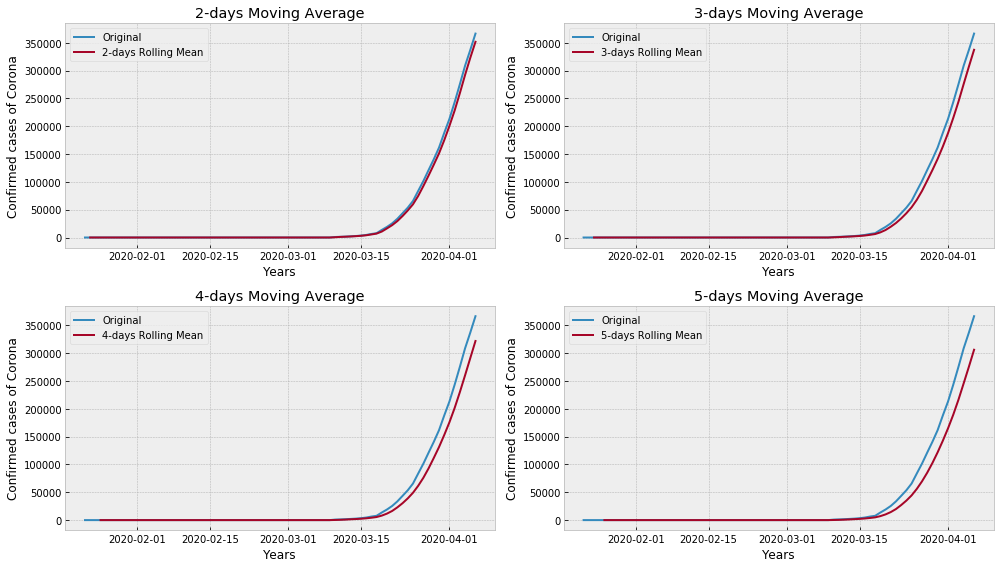

In [17]:
rollingmean(train,'US')

In [18]:
#!pip install stldecompose
#import stldecompose as stl
# the main library has a small set of functionality
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive,
                                         drift, 
                                         mean, 
                                         seasonal_naive)

In [30]:
def Decomp(df,Country):
    train_ts=df[df['Country_Region']==Country]['ConfirmedCases']
    decomp = decompose(train_ts, period=4)
    fcast = forecast(decomp, steps=36, fc_func=drift, seasonal=False)
    f,ax=plt.subplots()
    
    
    plt.plot(train_ts, '--', label='obs')
    plt.plot(decomp.trend, ':', label='decomp.trend')
    plt.plot(fcast, '-', label=fcast.columns[0])
    plt.xticks(rotation=90)
    plt.legend()
    decomp.plot()

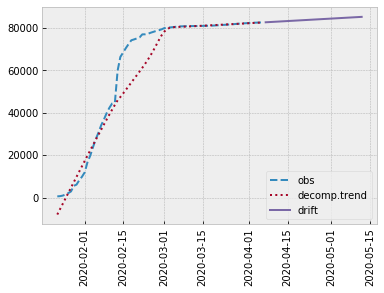

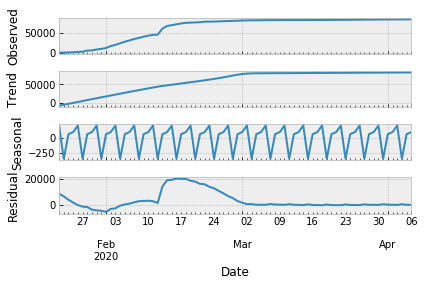

In [31]:
Decomp(train,'China')

In [32]:
import calendar

In [34]:
def monthly_spread(df,Country):
    train_ts=df[df['Country_Region']==Country]['ConfirmedCases']
    train_ts=train_ts.reset_index()
    train_ts['Month'] = train_ts.Date.apply(lambda x:x.month)
    train_ts['Year'] = train_ts.Date.apply(lambda x:x.year)
    
    train_ts['Month'] = train_ts['Month'].apply(lambda x: calendar.month_abbr[x])
    monthly_spread_data = pd.pivot_table(train_ts, values = "ConfirmedCases", columns = "Year", index = "Month")
    monthly_spread_data = monthly_spread_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun'])
    monthly_spread_data.plot()
    plt.show()


In [ ]:
#train['Month'] = train.Date.apply(lambda x:x.month)
#train['Year'] = train.Date.apply(lambda x:x.year)
#train['date'] = train.Date.apply(lambda x:x.day)



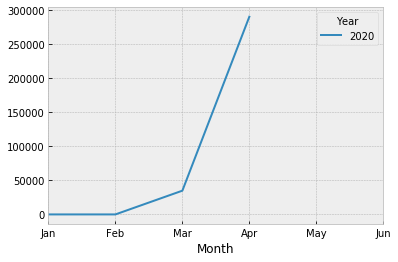

In [35]:
monthly_spread(train,'US')

In [1356]:
def spread_rate(df,Country):
    train_ts=df[df['Country_Region']==Country]['ConfirmedCases']
    train_ts['SpreadRate'] = 0
    for iv in train_ts.index:
        if  (iv == train_ts.index.min().date()):
            train_ts.loc[iv,'SpreadRate']= train_ts.loc[train_ts.index.min(),'ConfirmedCases']
        else:
            train_ts.loc[iv,'SpreadRate']= train_ts.loc[iv,'ConfirmedCases']-train_ts.loc[iv-np.timedelta64(1,'D'),'ConfirmedCases']

### Dickey-Fuller Test 
- Let's run the Dicky Fuller Test on the timeseries and verify the null hypothesis that the TS is non-stationary.

In [114]:
     
def dftest(df,Country):
    global train_ts
    train_ts=df[(df['Country_Region']==Country) & (df['ConfirmedCases']>10)]['ConfirmedCases']
    dftest = adfuller(train_ts)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
    
    if dfoutput['p-value']<0.01:
        print('p-value',dfoutput['p-value'])
        return train_ts.plot()
    else:
        train_ts = np.log10((train_ts))
        dftest = adfuller(train_ts)
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
        if dfoutput['p-value']<0.01:
            print('p-value using log',dfoutput['p-value'])
            return train_ts.plot()
        else:
            train_ts = train_ts.diff(1).dropna()
            dftest = adfuller(train_ts)
            dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
            if dfoutput['p-value']<0.01:
                print('p-value using log+difference',dfoutput['p-value'])
                return train_ts.plot()
 

p-value using log+difference 1.9900103618592258e-06


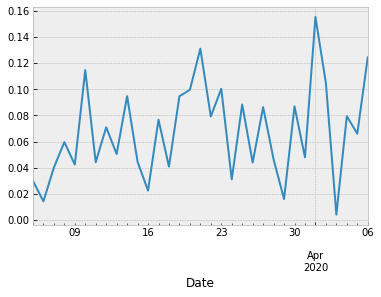

In [115]:
dftest(train,'India')

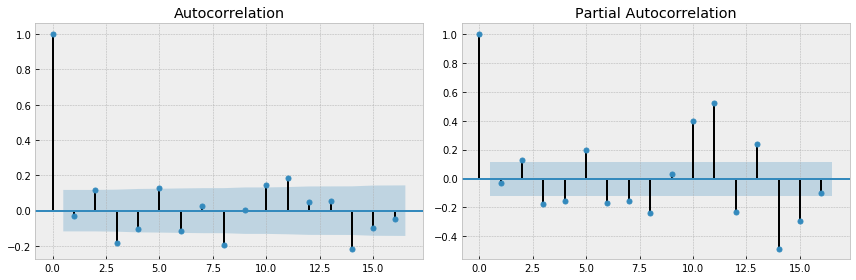

In [116]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(train_ts, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(train_ts, ax=axes[1], alpha=0.5,method='ols')
plt.tight_layout()

In [56]:
from statsmodels.tsa.arima_model import ARIMA

### Iterate the process to find the best values for p, d, q

In [117]:
import itertools
import warnings

In [118]:
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 3)
d = range(2,3)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

In [119]:
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
temp_model = None

for param in pdq:
    
        
    try:
        temp_model = ARIMA(train_ts,order = param)
        results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
               
    except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best ARIMA{}12 model - AIC:{}".format(best_pdq, best_aic))

Best ARIMA(1, 2, 1)12 model - AIC:-95.73705823351783


In [120]:
best_pdq

(1, 2, 1)

In [121]:
best_model = ARIMA(train_ts,order=best_pdq)
best_results = best_model.fit()

In [122]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                             ARIMA Model Results                              
Dep. Variable:      D2.ConfirmedCases   No. Observations:                   31
Model:                 ARIMA(1, 2, 1)   Log Likelihood                  51.869
Method:                       css-mle   S.D. of innovations              0.042
Date:                Fri, 10 Apr 2020   AIC                            -95.737
Time:                        07:52:07   BIC                            -90.001
Sample:                    03-07-2020   HQIC                           -93.867
                         - 04-06-2020                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -4.618e-05      0.001     -0.087      0.932      -0.001       0.001
ar.L1.D2.ConfirmedCases    -0.5665      0.145     -3.897      0.001      -0.851      -0.282


In [123]:
size = int(len(train_ts) * 0.85)
train= train_ts[:size]
test = train_ts[size:]

Text(0.5, 1.0, 'True vs predicted values')

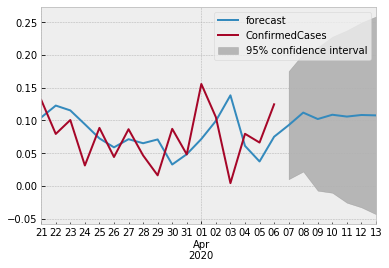

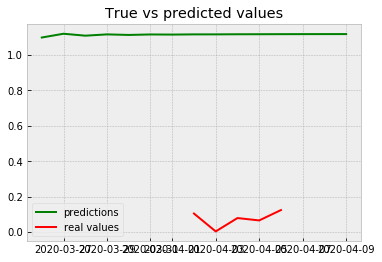

In [126]:
best_results.plot_predict(start=int(len(train_ts) * 0.5), end=int(len(train_ts) * 1.2))
if train_ts.mean()<1:
    pred=np.exp(best_results.forecast(steps=len(test)+10)[0])
else:
    pred=best_results.forecast(steps=len(test)+10)[0]
dates = pd.date_range(start='2020-03-26', freq='D', periods=len(pred))
pred=pd.Series(pred,index=dates)
    #Plotting results
f,ax=plt.subplots()
plt.plot(pred,c='green', label= 'predictions')
plt.plot(test, c='red',label='real values')
plt.legend()
plt.title('True vs predicted values')
   

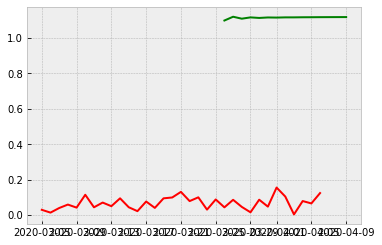

In [127]:
 #Plotting results
plt.plot(pred, label= 'predictions',c='green')
plt.plot(train_ts['2020-02-01':], c='red',label='real values')    

In [100]:
#Mean absolute percentage error
MAPE_last1year = np.mean(np.abs(test - pred)/test)

In [101]:
print('The Mean Absolute percentage error of our forecast for last two years is {}'.format(round(MAPE_last1year, 4)))


The Mean Absolute percentage error of our forecast for last two years is 1.3893


In [102]:
# Compute the mean square error
mse = ((test - pred) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
print('The ROOT Mean Squared Error of our forecasts is {}'.format(np.sqrt(round(mse, 4))))

The Mean Squared Error of our forecasts is 175499393029.7526
The ROOT Mean Squared Error of our forecasts is 418926.47687840473
